# **EE 769: Assignment II: ML for Smart Monkeys**

### *Submitted By: Kirti Agrawal & Tanmay Goyal*
---

# Description 
Some experiments were conducted on mice to see if a treatment of Down’s syndrome works or not. Mice were divided into control and diseased (genotype), treated or untreated and whether it shows a particular behavior or not (treatment_behavior). Readings for 77 proteins were recorded for the mice, but some of the readings were discarded if they seemed unreliable (out of range). Your job is to develop a pre-processing pipeline and a classifier, and also find out which subset of proteins is important in predicting which class.

### Import Statements

In [ ]:
# Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

### Data Reading & Pre-processing

Reading training data from: https://www.ee.iitb.ac.in/~asethi/Dump/MouseTrain.csv

Reading Test data from: https://www.ee.iitb.ac.in/~asethi/Dump/MouseTest.csv


In [ ]:
# Reading Training Data
df_train = pd.read_csv("https://www.ee.iitb.ac.in/~asethi/Dump/MouseTrain.csv")
display(df_train)

# Reading Test Data
df_test = pd.read_csv("https://www.ee.iitb.ac.in/~asethi/Dump/MouseTest.csv")
display(df_test)


DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N   pBRAF_N  \
0    0.503644  0.747193  0.430175  2.816329  5.990152  0.218830  0.177565   
1    0.514617  0.689064  0.411770  2.789514  5.685038  0.211636  0.172817   
2    0.509183  0.730247  0.418309  2.687201  5.622059  0.209011  0.175722   
3    0.442107  0.617076  0.358626  2.466947  4.979503  0.222886  0.176463   
4    0.434940  0.617430  0.358802  2.365785  4.718679  0.213106  0.173627   
..        ...       ...       ...       ...       ...       ...       ...   
757  0.394169  0.623696  0.316564  2.104045  3.314706  0.234529  0.200657   
758  0.401739  0.659571  0.321841  2.183930  3.411782  0.236546  0.190826   
759  0.382182  0.586545  0.318545  2.072000  3.073636  0.259636  0.202727   
760  0.365622  0.572209  0.297992  2.004931  2.783551  0.245333  0.190384   
761  0.365605  0.599499  0.301539  2.062813  2.952577  0.248568  0.198819   

     pCAMKII_N   pCREB_N    pELK_N  ...    BCL2_N     pS6_N   pCFOS_N  \
0     2.373744  0.232224  1.750936  ...       NaN  0.106305  0.108336   
1     2.292150  0.226972  1.596377  ...       NaN  0.106592  0.104315   
2     2.283337  0.230247  1.561316  ...       NaN  0.108303  0.106219   
3     2.152301  0.207004  1.595086  ...       NaN  0.103184  0.111262   
4     2.134014  0.192158  1.504230  ...       NaN  0.104784  0.110694   
..         ...       ...       ...  ...       ...       ...       ...   
757   3.208804  0.221809  1.218951  ...  0.110916  0.119428  0.115567   
758   3.384350  0.231899  1.250487  ...  0.110350  0.118081  0.108944   
759   3.006364  0.223455  1.248727  ...  0.133664  0.116134  0.114635   
760   2.948221  0.217506  1.177527  ...  0.136994  0.120649  0.120649   
761   3.069435  0.226736  1.220472  ...  0.120182  0.121738  0.110486   

        SYP_N  H3AcK18_N    EGR1_N  H3MeK4_N    CaNA_N  Genotype  \
0    0.427099   0.114783  0.131790  0.128186  1.675652   Control   
1    0.441581   0.111974  0.135103  0.131119  1.743610   Control   
2    0.435777   0.111883  0.133362  0.127431  1.926427   Control   
3    0.391691   0.130405  0.147444  0.146901  1.700563   Control   
4    0.434154   0.118481  0.140314  0.148380  1.839730   Control   
..        ...        ...       ...       ...       ...       ...   
757  0.441207   0.148473  0.146192  0.190681  1.474465    Ts65Dn   
758  0.444913   0.153137  0.149798  0.197944  1.516605    Ts65Dn   
759  0.422789   0.148426  0.163649  0.191212  1.433514    Ts65Dn   
760  0.459901   0.146872  0.140640  0.213899  1.543274    Ts65Dn   
761  0.424228   0.173689  0.166268  0.206129  1.520110    Ts65Dn   

     Treatment_Behavior  
0         Memantine_C/S  
1         Memantine_C/S  
2         Memantine_C/S  
3         Memantine_C/S  
4         Memantine_C/S  
..                  ...  
757          Saline_S/C  
758          Saline_S/C  
759          Saline_S/C  
760          Saline_S/C  
761          Saline_S/C  

[762 rows x 79 columns]

DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N   pBRAF_N  \
0    0.627582  0.954187  0.446958  2.930717  5.915039  0.197897  0.185599   
1    0.651253  0.962021  0.464964  2.992689  5.975028  0.202810  0.188473   
2    0.644346  0.967179  0.470056  3.073847  5.927379  0.205131  0.182590   
3    0.568229  0.812018  0.393465  2.606780  5.808102  0.218211  0.179905   
4    0.587038  0.863728  0.411203  2.757975  6.006657  0.223688  0.189400   
..        ...       ...       ...       ...       ...       ...       ...   
220  0.226900  0.395432  0.248694  1.460666  1.860128  0.188536  0.148977   
221  0.261107  0.443780  0.276658  1.674129  2.256494  0.218216  0.176008   
222  0.216134  0.364058  0.241693  1.330831  1.737540  0.197125  0.151597   
223  0.212369  0.369960  0.239036  1.346827  1.814940  0.194538  0.143454   
224  0.257290  0.432628  0.289689  1.589289  2.125977  0.232704  0.177244   

     pCAMKII_N   pCREB_N    pELK_N  ...    BCL2_N     pS6_N   pCFOS_N  \
0     1.765115  0.232257  1.808111  ...  0.120835  0.148773  0.120885   
1     1.807824  0.259020  1.960691  ...  0.130462  0.147660  0.128960   
2     1.783552  0.258795  2.147883  ...  0.118851  0.143169  0.129154   
3     2.312324  0.209154  1.733692  ...  0.116218  0.140063  0.127661   
4     2.375283  0.218538  1.843255  ...  0.142739  0.140775  0.121389   
..         ...       ...       ...  ...       ...       ...       ...   
220   2.178982  0.165398  0.770115  ...  0.157209  0.122747  0.134559   
221   2.475735  0.184040  0.913363  ...  0.151454  0.119881  0.131988   
222   1.919489  0.162780  0.720767  ...  0.171437  0.118758  0.146772   
223   1.908112  0.155823  0.772530  ...  0.177576  0.121366  0.152825   
224   2.308557  0.181056  0.894797  ...  0.172697  0.123290  0.163880   

        SYP_N  H3AcK18_N    EGR1_N  H3MeK4_N    CaNA_N  Genotype  \
0    0.541241   0.121674  0.158103       NaN  1.649983   Control   
1    0.525966   0.126780  0.163405       NaN  1.638988   Control   
2    0.508214   0.122796  0.160293       NaN  1.564925   Control   
3    0.561721   0.123122  0.156108       NaN  1.682222   Control   
4    0.534845   0.133996  0.180373       NaN  1.660352   Control   
..        ...        ...       ...       ...       ...       ...   
220  0.400268   0.228568  0.233317  0.283853  1.160740    Ts65Dn   
221  0.407596   0.228843  0.226944  0.249970  1.139347    Ts65Dn   
222  0.431334   0.255633  0.257004  0.304811  1.142205    Ts65Dn   
223  0.395408   0.245564  0.255852  0.308484  1.112718    Ts65Dn   
224  0.402706   0.245363  0.278048  0.326087  1.171785    Ts65Dn   

     Treatment_Behavior  
0         Memantine_C/S  
1         Memantine_C/S  
2         Memantine_C/S  
3         Memantine_C/S  
4         Memantine_C/S  
..                  ...  
220          Saline_S/C  
221          Saline_S/C  
222          Saline_S/C  
223          Saline_S/C  
224          Saline_S/C  

[225 rows x 79 columns]

Observations

1.   Both training and test data have 79 columns, with different data types and scales. 

Next Steps

1.   Check data type of each column. 
2.   Check for missing values. 

In [ ]:
print("Types of Training Data: \n")
print(df_train.dtypes)

print("Types of Test Data: \n")
print(df_test.dtypes)

Types of Training Data: 

DYRK1A_N              float64
ITSN1_N               float64
BDNF_N                float64
NR1_N                 float64
NR2A_N                float64
                       ...   
EGR1_N                float64
H3MeK4_N              float64
CaNA_N                float64
Genotype               object
Treatment_Behavior     object
Length: 79, dtype: object
Types of Test Data: 

DYRK1A_N              float64
ITSN1_N               float64
BDNF_N                float64
NR1_N                 float64
NR2A_N                float64
                       ...   
EGR1_N                float64
H3MeK4_N              float64
CaNA_N                float64
Genotype               object
Treatment_Behavior     object
Length: 79, dtype: object


In [ ]:
# Finding & Grouping Columns of each type in Training Data

df_train.columns.to_series().groupby(df_train.dtypes).groups

{float64: ['DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N', 'pBRAF_N', 'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N', 'PKCA_N', 'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N', 'pRSK_N', 'AKT_N', 'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N', 'GSK3B_N', 'JNK_N', 'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N', 'SOD1_N', 'MTOR_N', 'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N', 'pNUMB_N', 'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'NUMB_N', 'P70S6_N', 'pGSK3B_N', 'pPKCG_N', 'CDK5_N', 'S6_N', 'ADARB1_N', 'AcetylH3K9_N', 'RRP1_N', 'BAX_N', 'ARC_N', 'ERBB4_N', 'nNOS_N', 'Tau_N', 'GFAP_N', 'GluR3_N', 'GluR4_N', 'IL1B_N', 'P3525_N', 'pCASP9_N', 'PSD95_N', 'SNCA_N', 'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'BAD_N', 'BCL2_N', 'pS6_N', 'pCFOS_N', 'SYP_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N', 'CaNA_N'], object: ['Genotype', 'Treatment_Behavior']}

In [ ]:
# Finding & Grouping Columns of each type in Test Data

df_test.columns.to_series().groupby(df_test.dtypes).groups

{float64: ['DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N', 'pBRAF_N', 'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N', 'PKCA_N', 'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N', 'pRSK_N', 'AKT_N', 'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N', 'GSK3B_N', 'JNK_N', 'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N', 'SOD1_N', 'MTOR_N', 'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N', 'pNUMB_N', 'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'NUMB_N', 'P70S6_N', 'pGSK3B_N', 'pPKCG_N', 'CDK5_N', 'S6_N', 'ADARB1_N', 'AcetylH3K9_N', 'RRP1_N', 'BAX_N', 'ARC_N', 'ERBB4_N', 'nNOS_N', 'Tau_N', 'GFAP_N', 'GluR3_N', 'GluR4_N', 'IL1B_N', 'P3525_N', 'pCASP9_N', 'PSD95_N', 'SNCA_N', 'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'BAD_N', 'BCL2_N', 'pS6_N', 'pCFOS_N', 'SYP_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N', 'CaNA_N'], object: ['Genotype', 'Treatment_Behavior']}

Observations


1.   Out of 79, 77 data types are float, i.e., numerical. 
2.   Last two columns are categorical, hence we have to convert them into dummy numbers. 

Next Steps


1.   Check for number of unique values and null entries.

In [ ]:
# Computing the data type, number of unique and null values per predictor variable
for col in df_train.columns.values:
  list_vals = pd.unique(df_train[col])
  print(col + ' is of type ' + str(df_train[col].dtypes) + ', has ' + str(len(list_vals)) + ' unique values, and ' + str(df_train[col].isnull().sum(axis=0)) + ' null entries' )

  if len(list_vals)<10:
    list_str = ''
    for n_value in range(0,len(list_vals)):
      list_str = list_str + str(list_vals[n_value]) + ', '
    print('  These are: ' + list_str[0:len(list_str)-2])

DYRK1A_N is of type float64, has 762 unique values, and 0 null entries
ITSN1_N is of type float64, has 761 unique values, and 0 null entries
BDNF_N is of type float64, has 762 unique values, and 0 null entries
NR1_N is of type float64, has 762 unique values, and 0 null entries
NR2A_N is of type float64, has 762 unique values, and 0 null entries
pAKT_N is of type float64, has 762 unique values, and 0 null entries
pBRAF_N is of type float64, has 760 unique values, and 0 null entries
pCAMKII_N is of type float64, has 762 unique values, and 0 null entries
pCREB_N is of type float64, has 762 unique values, and 0 null entries
pELK_N is of type float64, has 762 unique values, and 0 null entries
pERK_N is of type float64, has 762 unique values, and 0 null entries
pJNK_N is of type float64, has 761 unique values, and 0 null entries
PKCA_N is of type float64, has 762 unique values, and 0 null entries
pMEK_N is of type float64, has 762 unique values, and 0 null entries
pNR1_N is of type float64, 

Observations


1.   For practical purposes, the 77 float64 predictor variables have lots of unique values, they can be treated as continuous variable. 
2.   Variable Genotype has 2 discrete values. (Binary Class)
3.  Whereas, variable Treatment Behaviour has 4 unique values. (Multi-label Class)

> Null Entries


1.   ELK_N has 15 null entries
2.   MEK_N has 4 null entries
3. BCatenin_N has 15 null entries. 
4. BAD_N has 180 null entries. 
5. BCL2_N has 195 null entries. 
6. pCFOS_N has 60 null entries. 
7. H3AcK18_N has 150 null entries. 
8. EGR1_N has 180 null entries.
9. H3MeK4_N has 180 null entries. 

Next Steps

1. Plot histograms to check the spread of each column. 




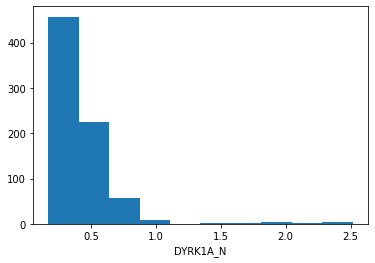

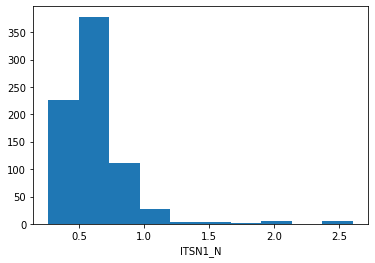

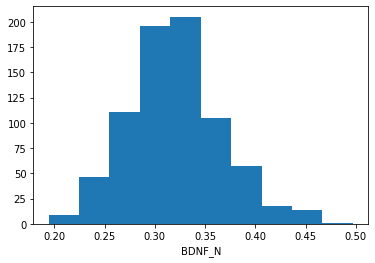

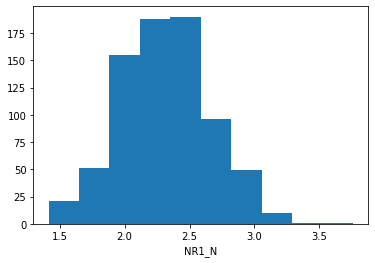

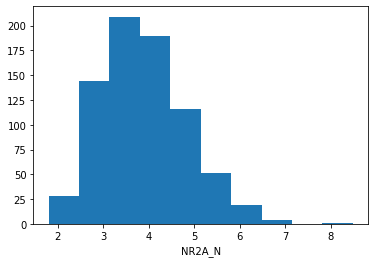

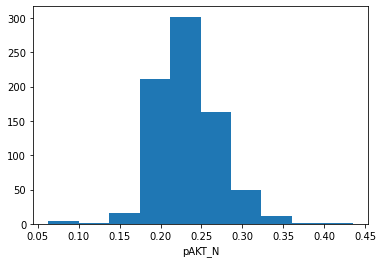

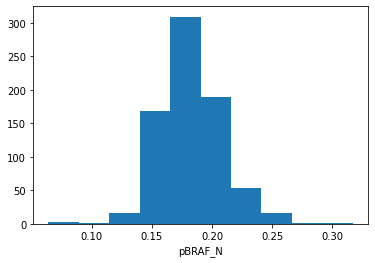

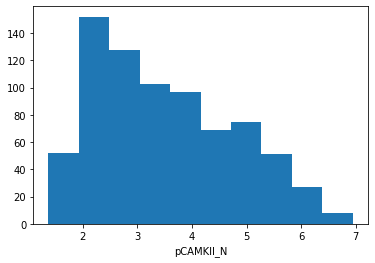

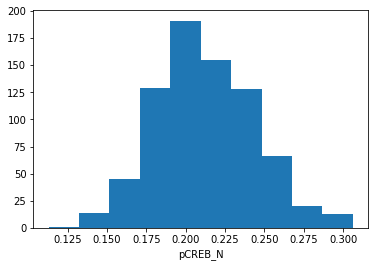

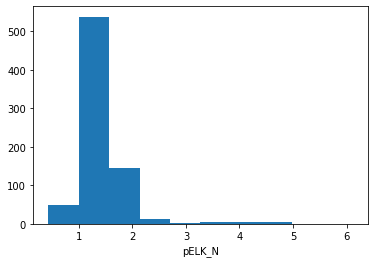

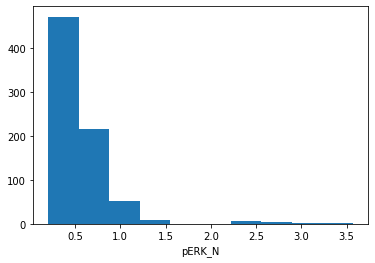

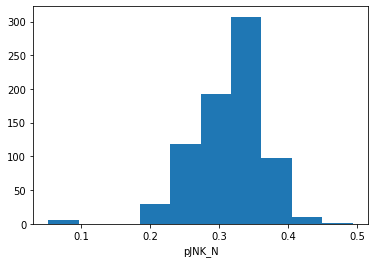

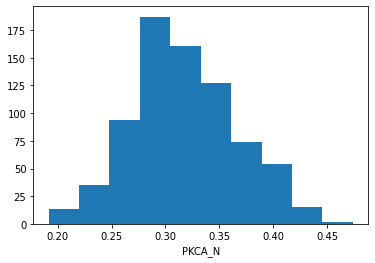

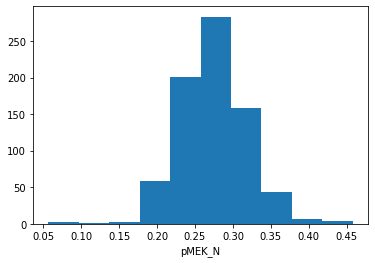

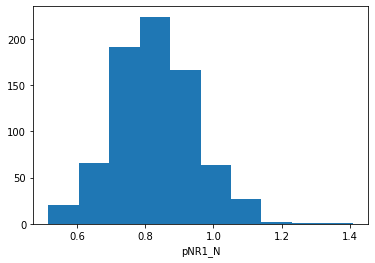

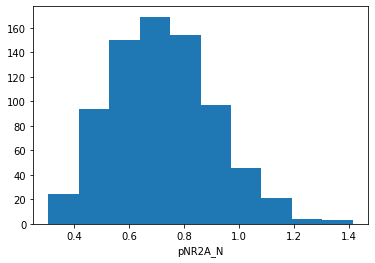

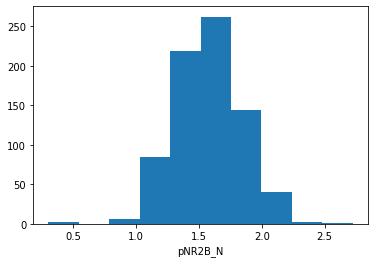

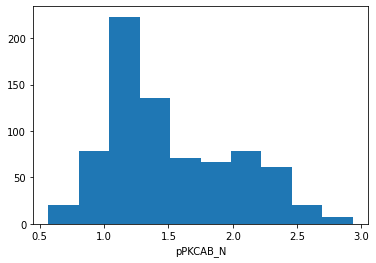

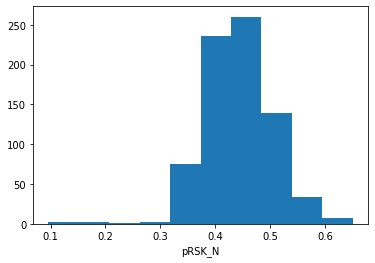

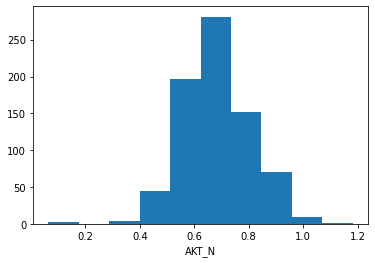

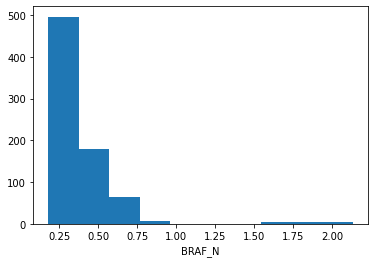

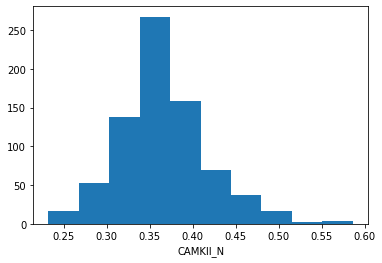

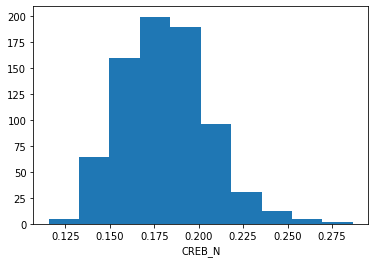

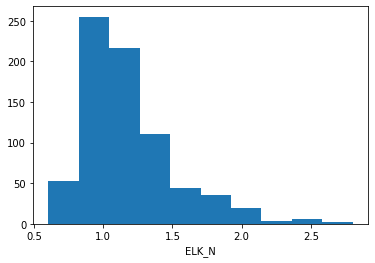

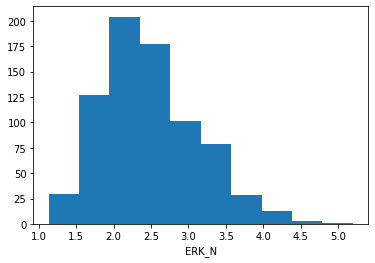

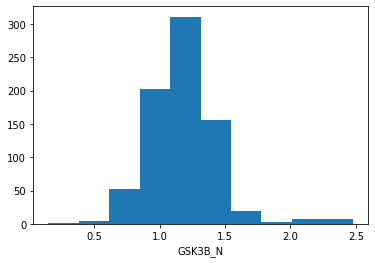

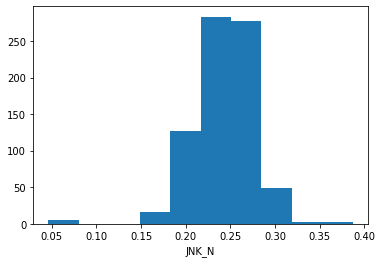

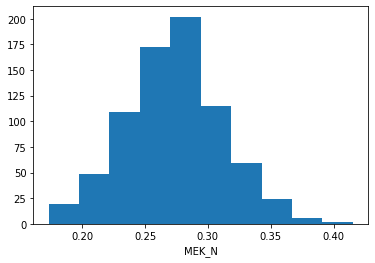

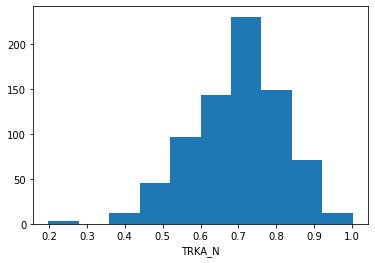

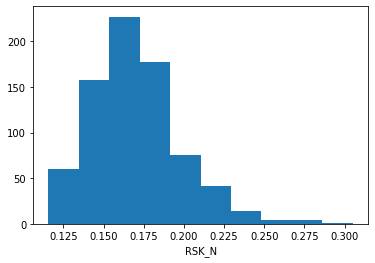

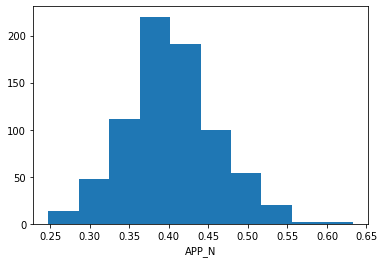

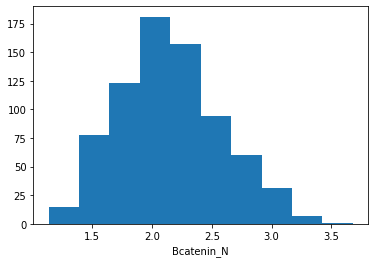

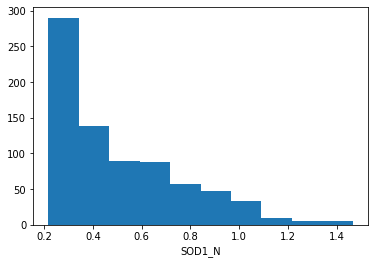

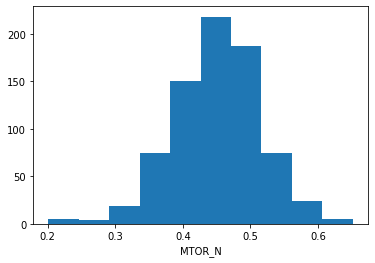

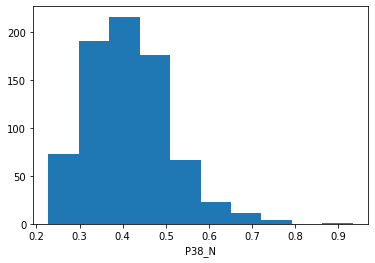

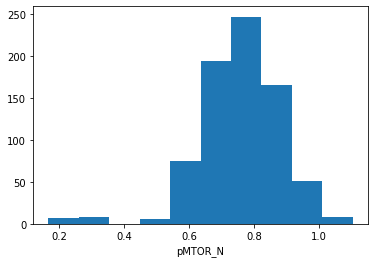

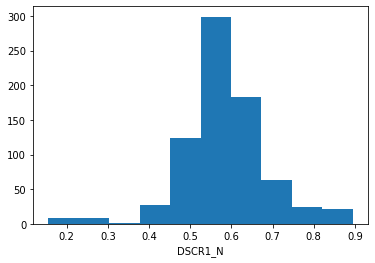

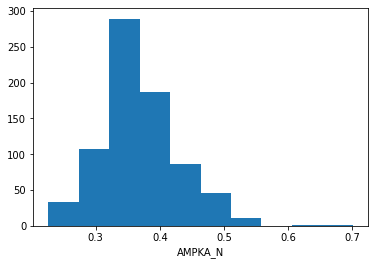

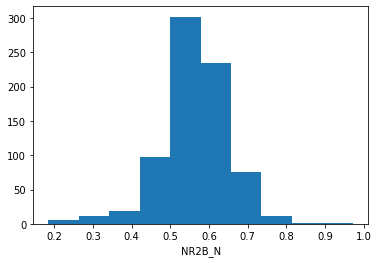

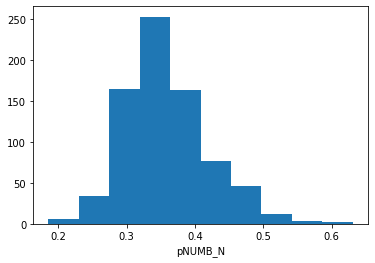

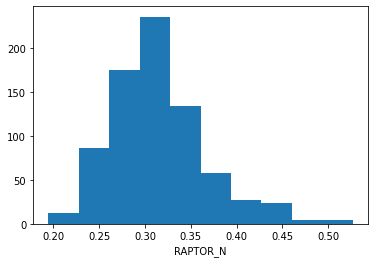

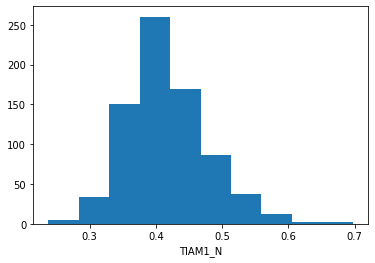

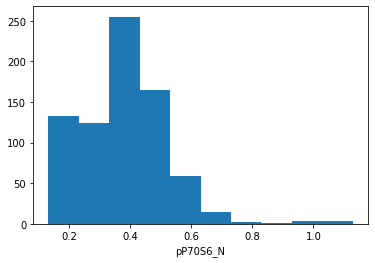

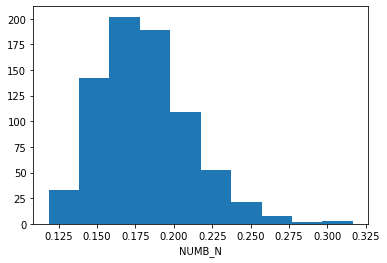

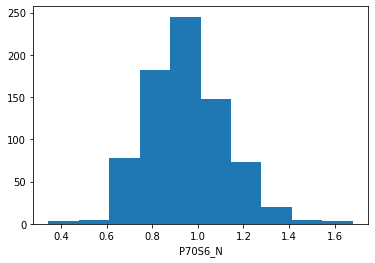

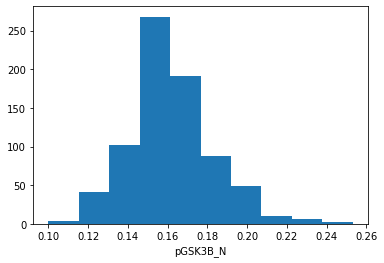

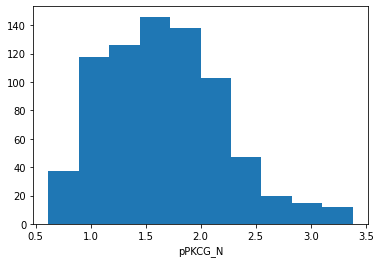

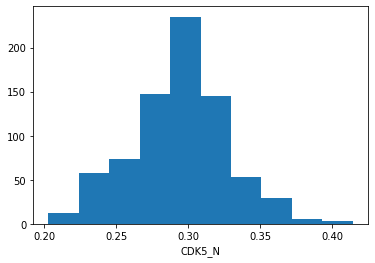

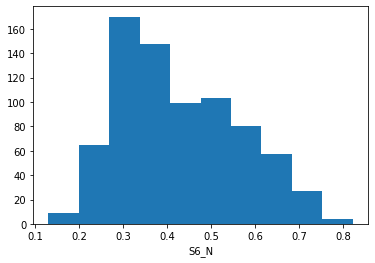

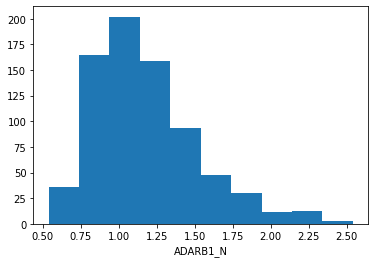

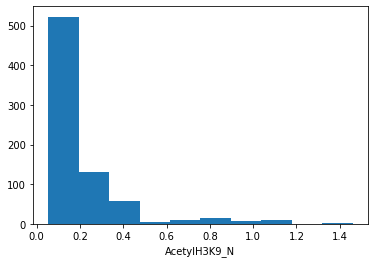

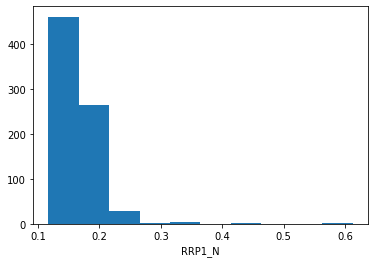

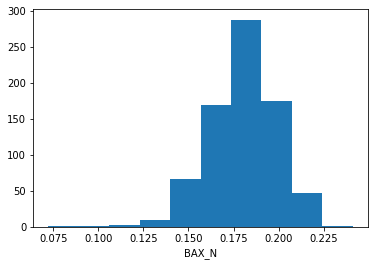

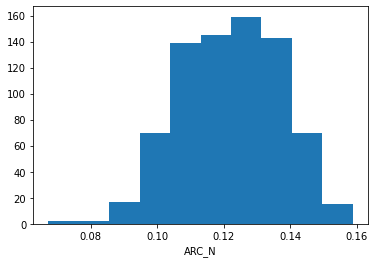

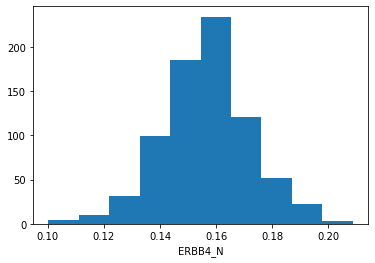

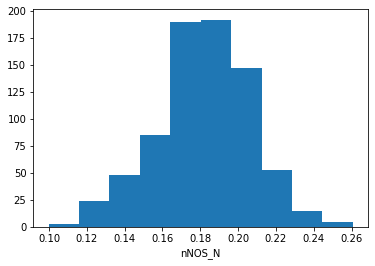

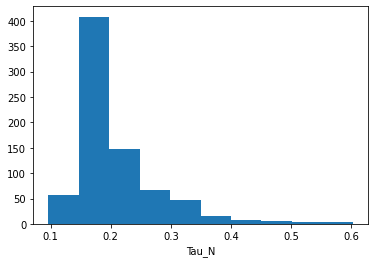

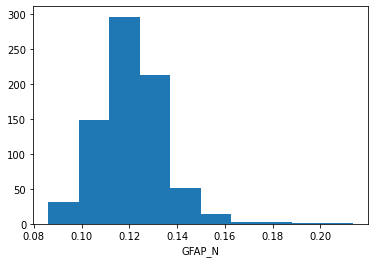

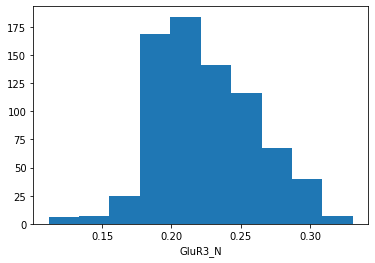

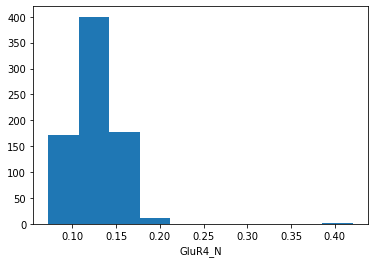

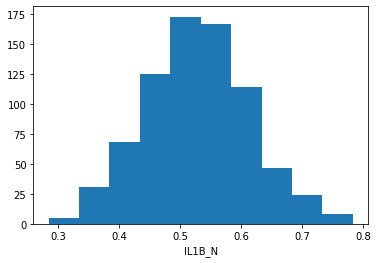

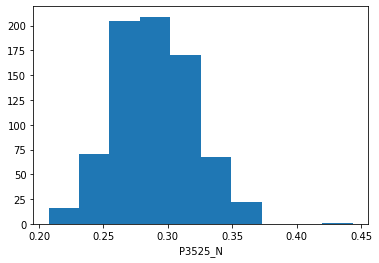

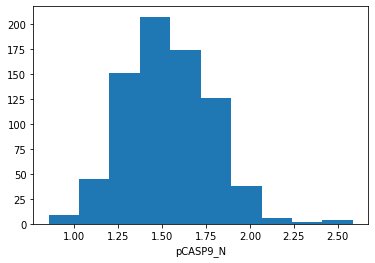

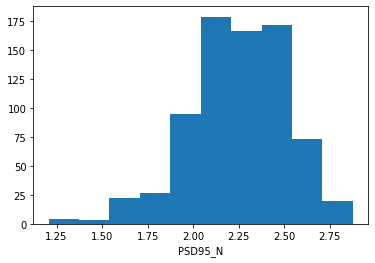

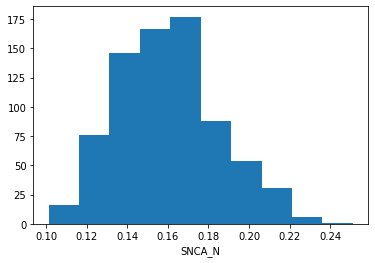

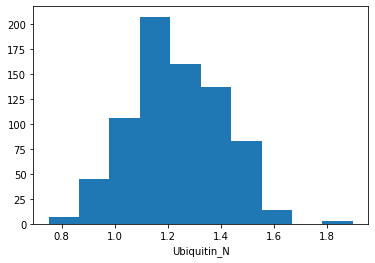

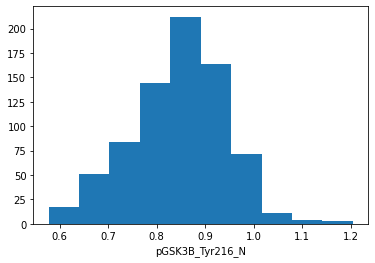

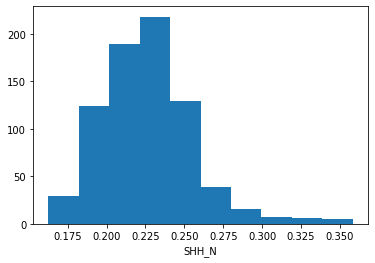

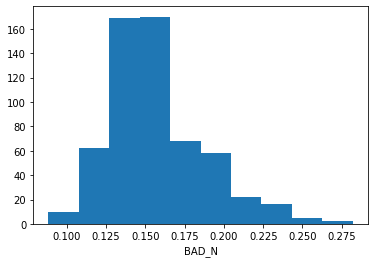

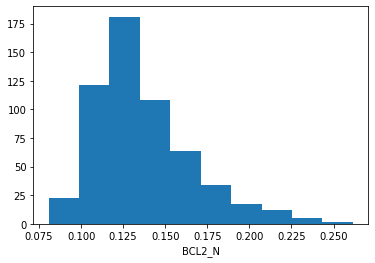

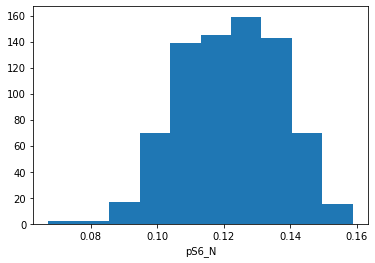

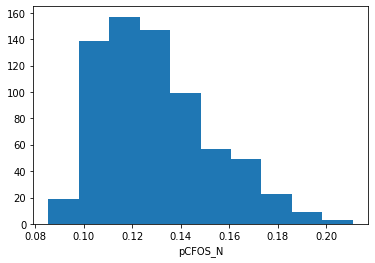

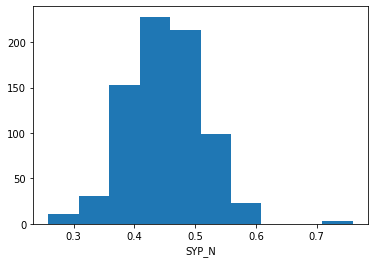

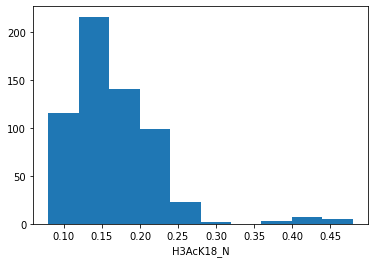

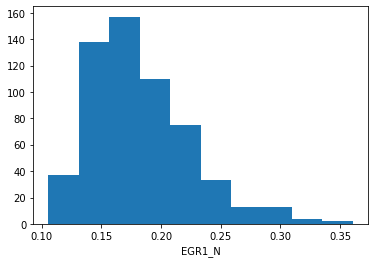

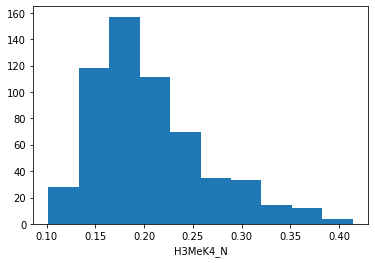

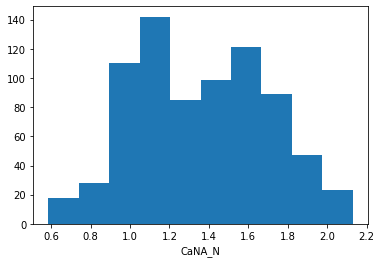

In [ ]:
# Plot Histograms for continous variables
for col in df_train.columns.values: #for all columns
  if (df_train[col].dtypes == 'int64')|(df_train[col].dtypes == 'float64'):
    plt.hist(df_train[col])
    plt.xlabel(col)
    plt.show()

Observations

1. All feature - variables seem to be well-spread. 

Next Steps

1. We are exploring correlation between the variables. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1986bced50>,
        ...,
        ...,
        ...,
       ...,
        ...,
        ...,
        ...,
      dtype=object)

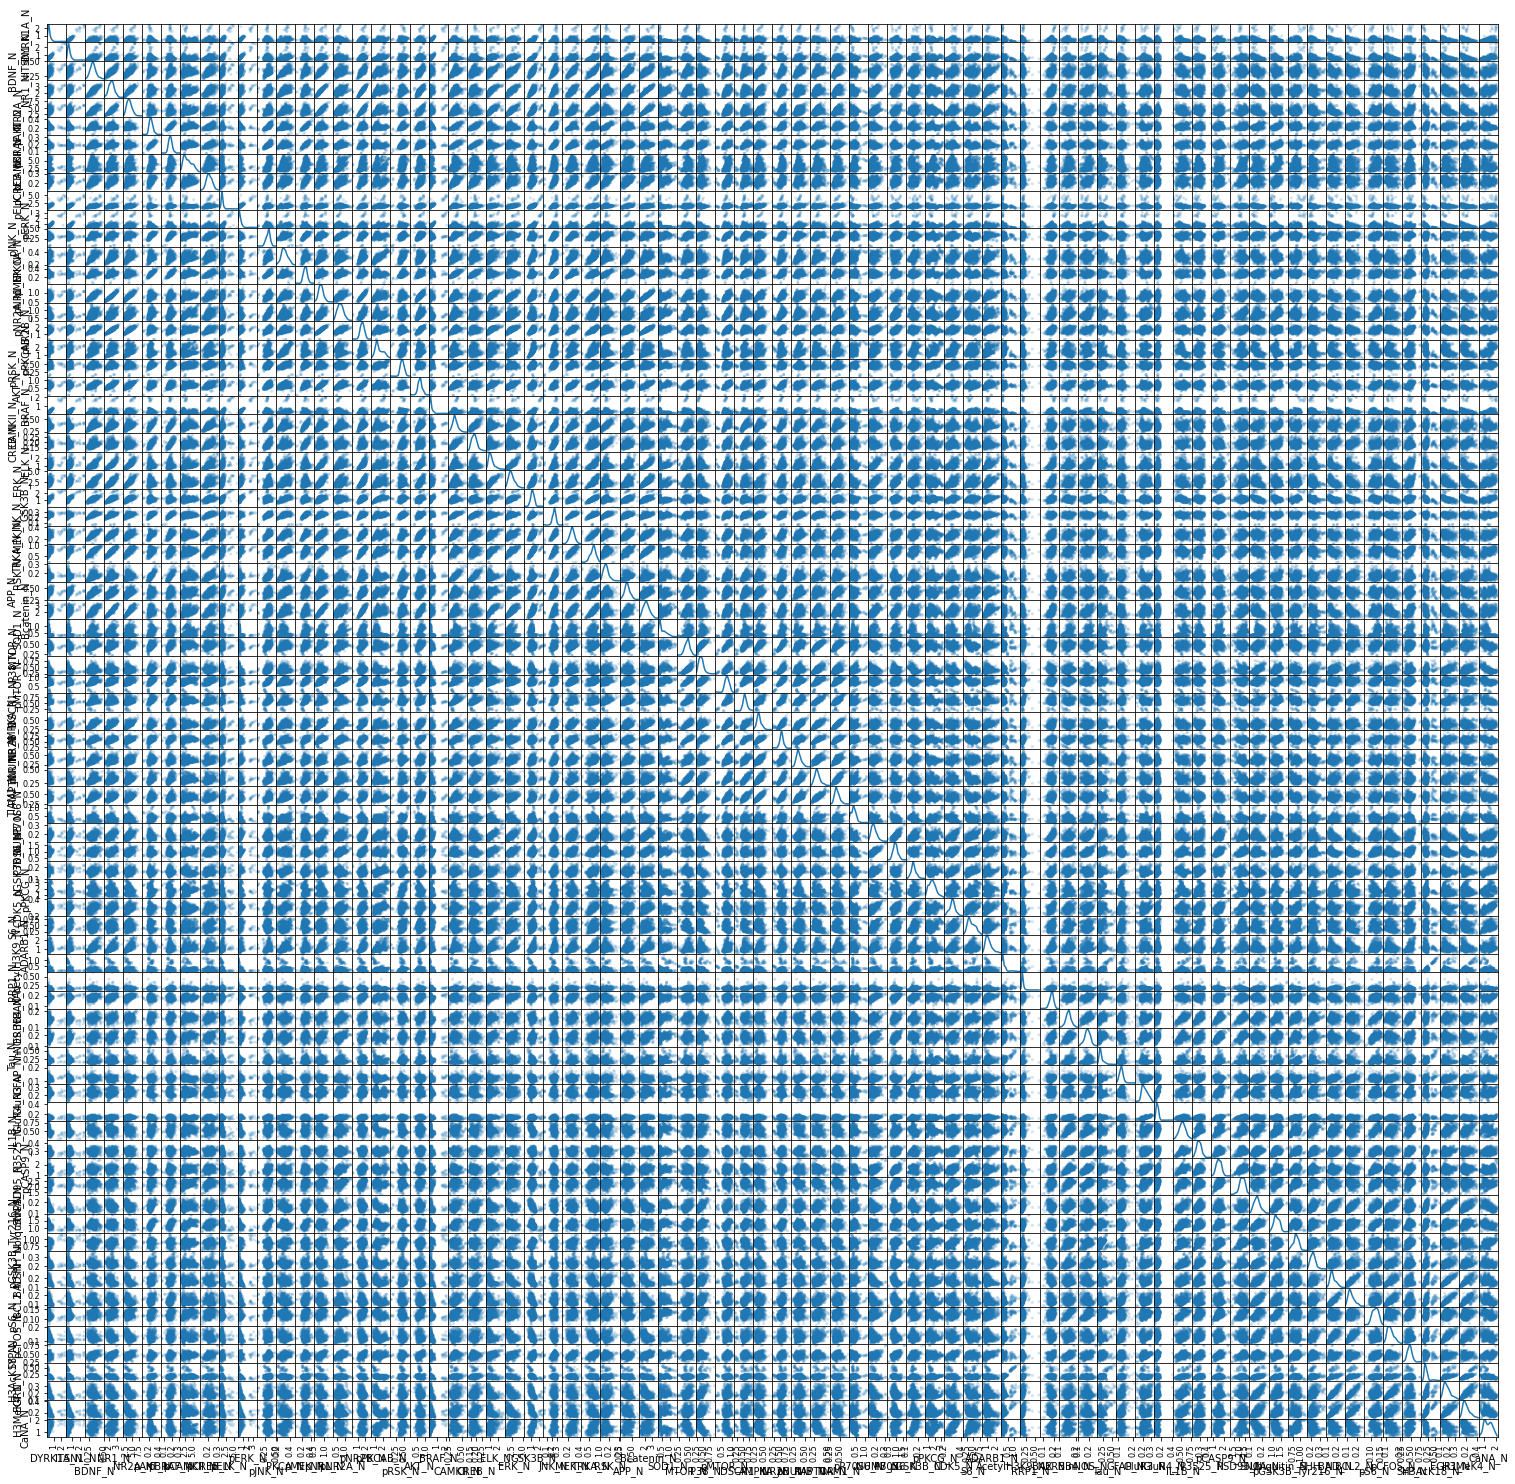

In [ ]:
# Plotting Pair Wise Scatter Matrices

from pandas.plotting import scatter_matrix
scatter_matrix(df_train, alpha = 0.2, figsize = (26,26), diagonal = 'kde')

Observations

1.   Features whose scatter plots looks like straight line or thin curves are correlated. 
2. We find that features ARC_N and pS6_N have a linear scatter plot. 
3.   Plotting the coorelation matrix to visualize it better. 

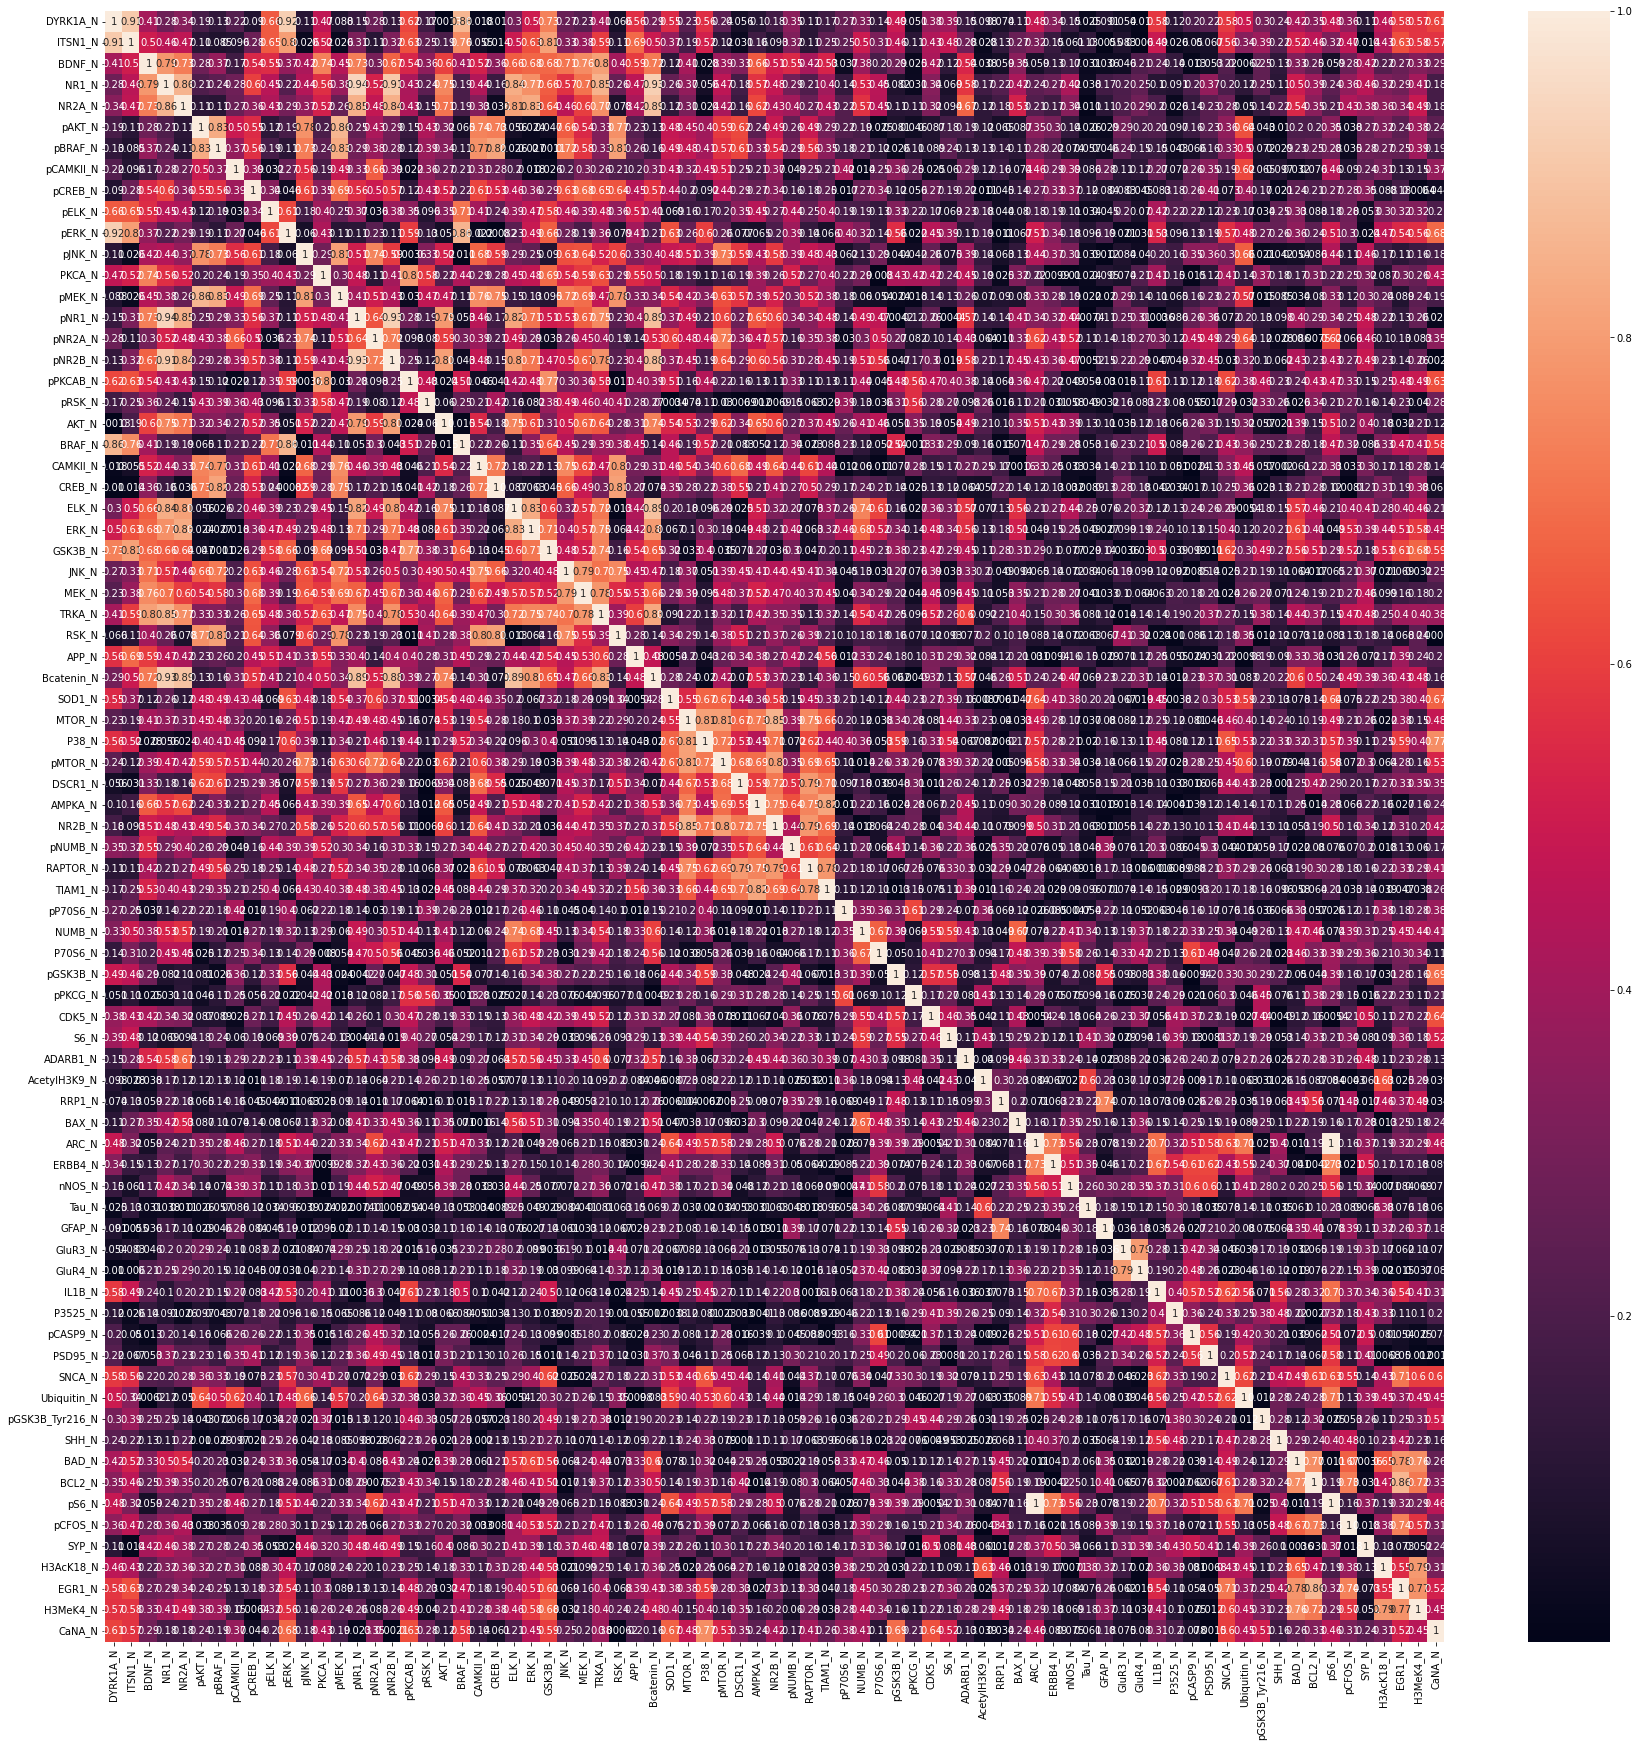

In [ ]:
#Numerical Data Exploration

# Collecting all the numeric data type features into df_num dataframe
df_num = df_train.select_dtypes(include=['int64','float64']).copy()

# Computing Coorelation between the 
corrMatrix = df_num.corr(method= 'spearman')
fig, ax = plt.subplots(figsize=(30,30))
sns.heatmap(abs(corrMatrix), annot = True)
plt.show()

Observations
1.   From the above correlation matrix we can conclude that features ARC_N and pS6_N are perfectly coorelated. 

Next Steps



1.   Dropping ARC_N column.
2.   Investigating the class imbalance. 



In [ ]:
# Dropping the ARC_N column 
del df_train['ARC_N']
print(df_train.shape)

(762, 78)


In [ ]:
# Dropping the ARC_N column 
del df_test['ARC_N']
print(df_test.shape)

(225, 78)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


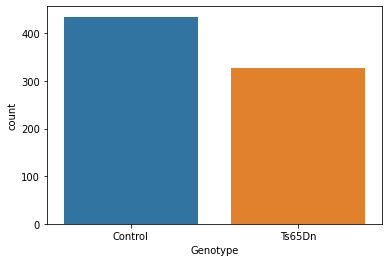

In [ ]:
# Computing the Class Imbalance for the binary classification variable
sns.countplot(df_train['Genotype'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


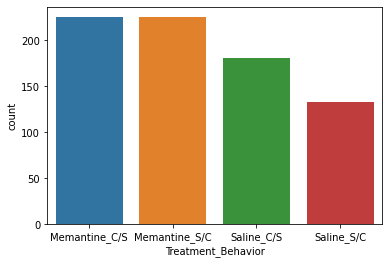

In [ ]:
# Computing the Class Imbalance for the multi-label classification variable 
sns.countplot(df_train['Treatment_Behavior'])

Observations


1.   From the above plots, it can be concluded that the classes are not perfectly balanced. 
2.   For Genotype, 'Control' has around 100 samples more than 'Ts65Dn'.
3. For Treatment Behaviour, 'Memantime_C/s' and 'Memantine_S/C' have approximately the same number of samples which is approximately 100 more than 'Saline_C/s'. 'Saline_S/C' has the least number of samples.



### Data Imputation

Imputing the missing data by implementing multivariate feature imputation. 

References: 
1.  https://scikit-learn.org/stable/modules/impute.html
2.  https://medium.com/analytics-vidhya/a-beginners-guide-to-multivariate-imputation-fe4ae5591544



Using the Matrix Function from the missingno, to visulaize the missing values from the dataset. 

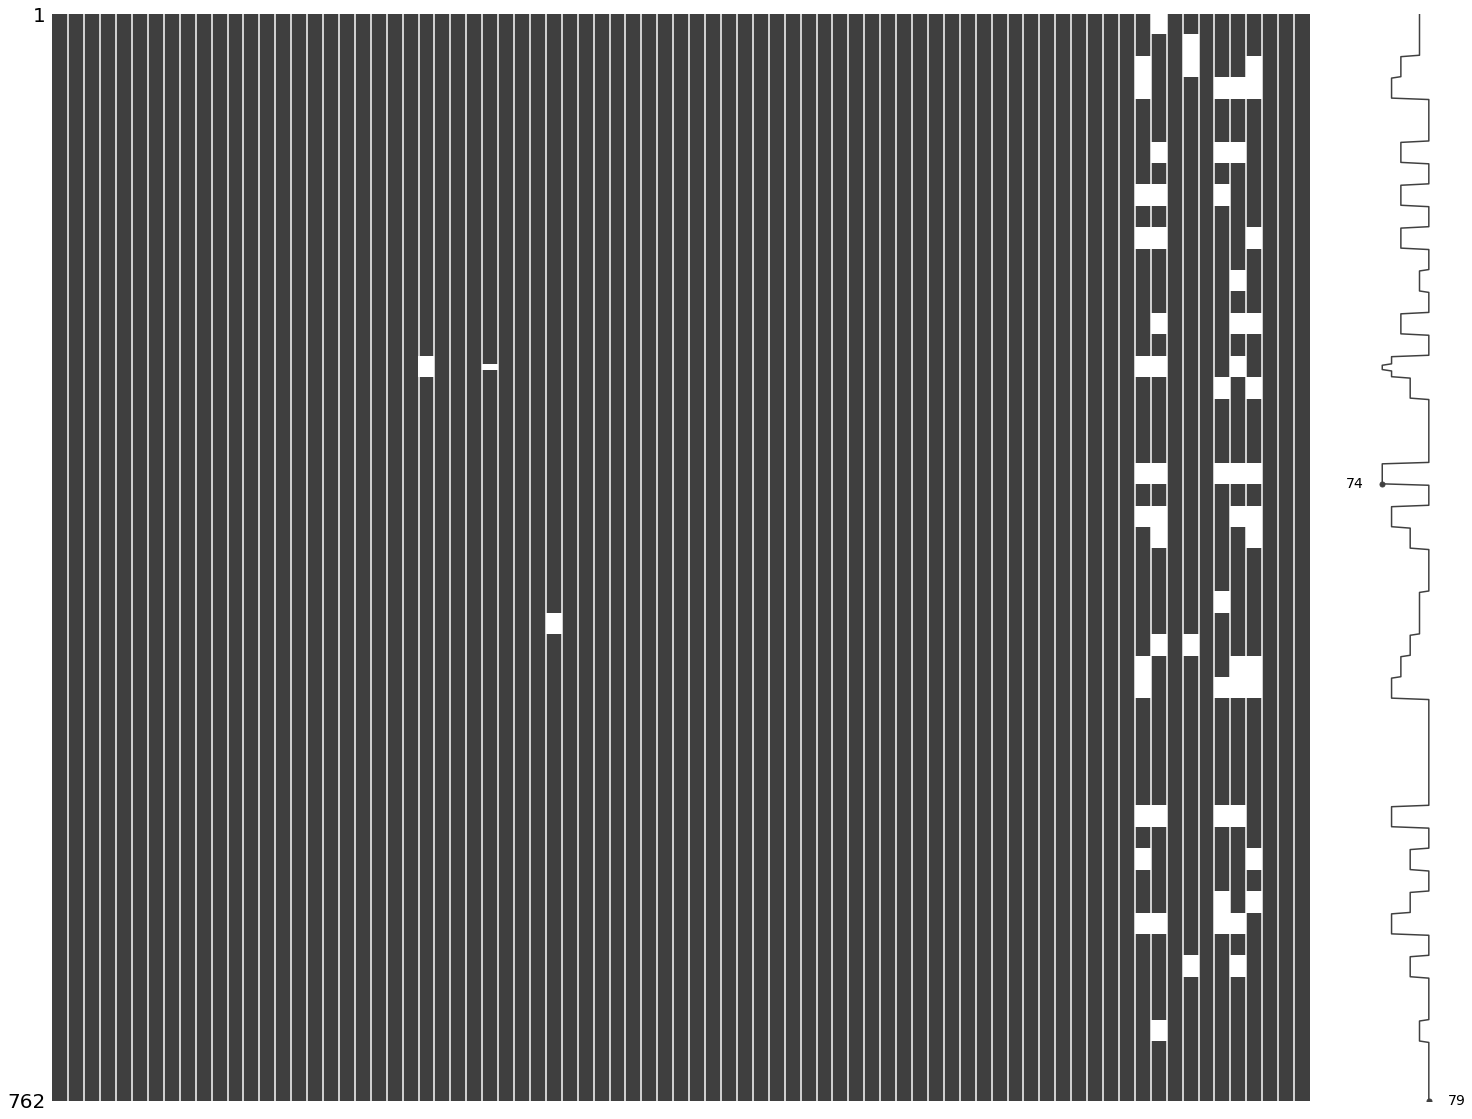

In [ ]:
# Visualizing the Missing Values
import missingno as msno
msno.matrix(df_train, figsize=(25, 20))

Observation
1. Each of the 78 black rectangular blocks represents variable from the data set, and the white rectangles represent the missing values for the variables.

Next Steps


1.   Before imputing the missing values, removing the target variables from the dataset. Since, we don't wish to use the target values for imputation. 



In [ ]:
# Using Multi Feature Imputation for Missing Values
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(max_iter=10, random_state=123)

# pulling out the non-target variables for imputation and performing the imputation
df_train.iloc[:, 0:76] = imputer.fit_transform(df_train.iloc[:, 0:76])


In [ ]:
# Using Multi Feature Imputation for Missing Values of test data

# pulling out the non-target variables for imputation and performing the imputation
df_test.iloc[:, 0:76] = imputer.fit_transform(df_test.iloc[:, 0:76])


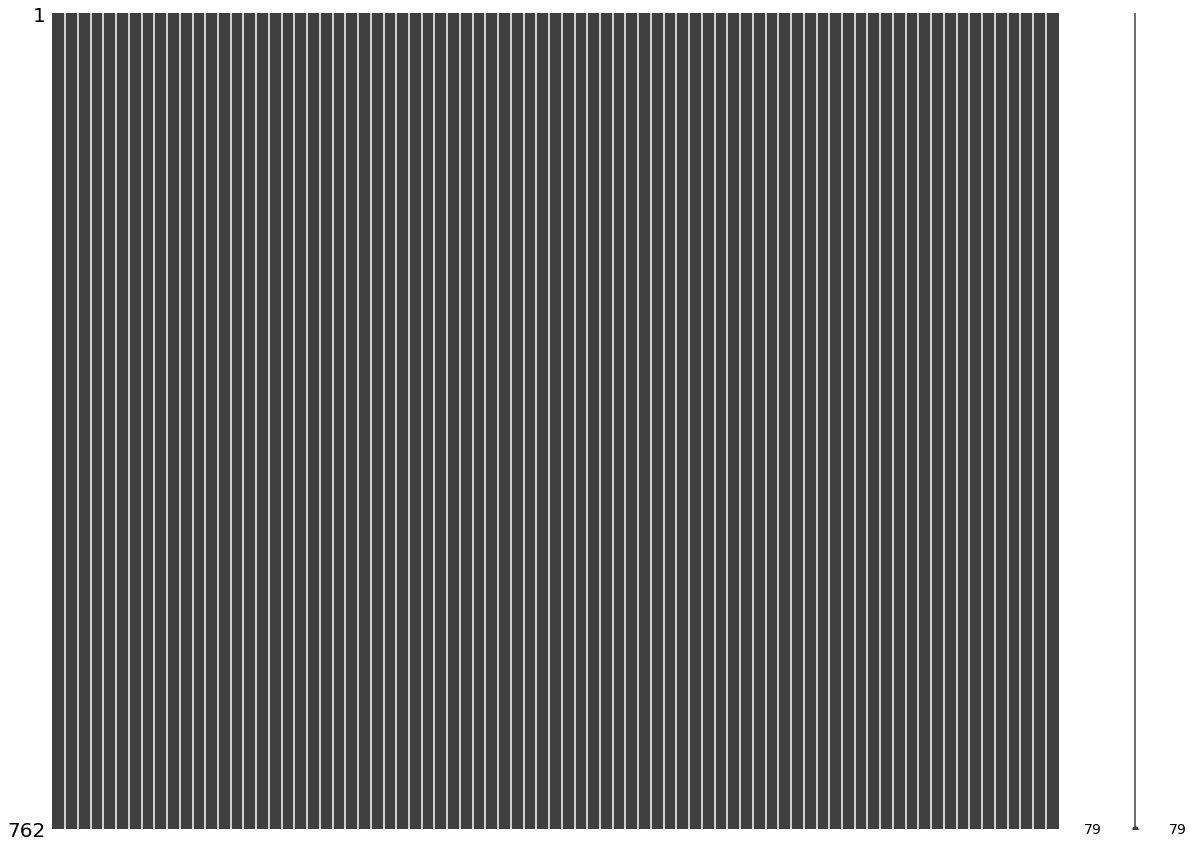

In [ ]:
# Visualizing the Imputed Matrix

import missingno as msno
msno.matrix(df_train, figsize=(20, 15))

Missing values have now been imputed using Multivariate Feature Imputation, as shown in the plot above. 



### Preparing Data


1.   Convert discrete variables to one-hot-bit (dummy)
2.   Normalizing the range so that there isn't any variable which has disproportionate sway in the model



In [ ]:
# Normalizing the data (shifting and scaling to obtain zero mean and unit variance)
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
scaler.fit(df_train.iloc[:, 0:76])

train_X = pd.DataFrame(scaler.transform(df_train.iloc[:, 0:76]))
train_Y_binary = pd.DataFrame(df_train['Genotype'])
train_Y_multi = pd.DataFrame(df_train['Treatment_Behavior'])

display(train_X)


0         1         2         3         4         5         6   \
0    0.239745  0.428489  2.372452  1.471921  2.269552 -0.351734 -0.186528   
1    0.279648  0.216934  1.976690  1.393675  1.940975 -0.533878 -0.365510   
2    0.259888  0.366815  2.117287  1.095124  1.873152 -0.600347 -0.256006   
3    0.015969 -0.045054  0.833934  0.452418  1.181185 -0.249043 -0.228099   
4   -0.010091 -0.043766  0.837716  0.157224  0.900303 -0.496664 -0.334981   
..        ...       ...       ...       ...       ...       ...       ...   
757 -0.158354 -0.020962 -0.070527 -0.606540 -0.611634  0.045756  0.683866   
758 -0.130826  0.109601  0.042935 -0.373432 -0.507093  0.096829  0.313293   
759 -0.201944 -0.156166 -0.027925 -0.700047 -0.871242  0.681455  0.761884   
760 -0.262164 -0.208343 -0.469880 -0.895755 -1.183635  0.319300  0.296632   
761 -0.262225 -0.109023 -0.393614 -0.726855 -1.001611  0.401220  0.614567   

           7         8         9   ...        66        67        68  \
0   -0.898820  0.648744  0.595213  ... -1.269701 -1.192958 -1.021577   
1   -0.963191  0.479587  0.292333  ... -0.878703 -1.384755 -0.972146   
2   -0.970144  0.585066  0.223626  ... -1.106122 -1.326089 -0.989585   
3   -1.073520 -0.163587  0.289803  ... -1.159352 -0.867534 -0.673580   
4   -1.087947 -0.641792  0.111757  ... -0.702678 -0.958361 -0.684759   
..        ...       ...       ...  ...       ...       ...       ...   
757 -0.240028  0.313292 -0.447289  ... -0.346465 -0.109664 -0.916984   
758 -0.101537  0.638293 -0.385489  ... -0.563470 -0.210745 -0.935266   
759 -0.399737  0.366285 -0.388938  ... -0.510605  0.213094 -0.182777   
760 -0.445606  0.174685 -0.528465  ... -0.979130 -0.037037 -0.075284   
761 -0.349979  0.471977 -0.444307  ... -0.024514  0.408282 -0.617920   

           69        70        71        72        73        74        75  
0   -1.058433 -0.901715 -0.371984 -0.727799 -1.248306 -1.441778  0.943046  
1   -1.039198 -1.072950 -0.139388 -0.761385 -1.178147 -1.390030  1.144768  
2   -0.924510 -0.991863 -0.232612 -0.762468 -1.215019 -1.455090  1.687436  
3   -1.267675 -0.777089 -0.940673 -0.541066 -0.916793 -1.111581  1.016991  
4   -1.160421 -0.801283 -0.258680 -0.683594 -1.067785 -1.085490  1.430089  
..        ...       ...       ...       ...       ...       ...       ...  
757 -0.178772 -0.593739 -0.145392 -0.325096 -0.943318 -0.339173  0.345848  
758 -0.269046 -0.875816 -0.085877 -0.269354 -0.866946 -0.211029  0.470936  
759 -0.399556 -0.633429 -0.441216 -0.325662 -0.573618 -0.329802  0.224291  
760 -0.096908 -0.377281  0.154848 -0.344234 -1.060893  0.070469  0.550098  
761 -0.023910 -0.810139 -0.418099 -0.023682 -0.518160 -0.066627  0.481340  

[762 rows x 76 columns]

In [ ]:
# Printing the mean of train_X

print(train_X.mean())

0    -1.202013e-17
1     6.756771e-17
2     1.719243e-16
3     9.949755e-16
4    -4.706063e-16
          ...     
71   -4.076646e-16
72    1.446058e-16
73    1.725253e-16
74    1.110223e-16
75    2.897580e-16
Length: 76, dtype: float64


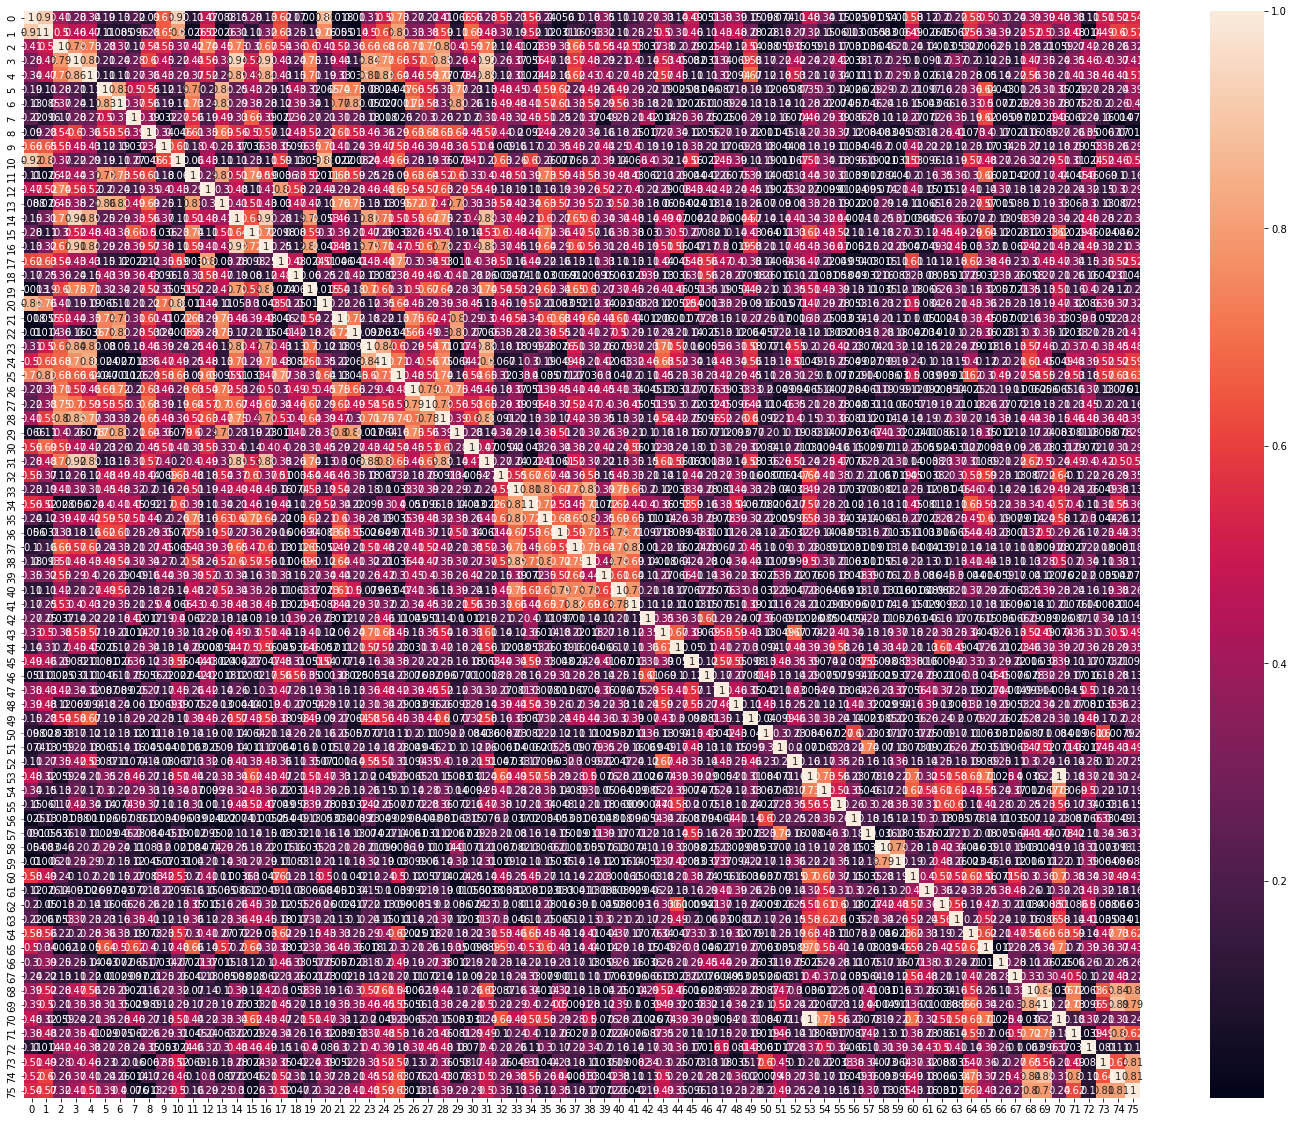

In [ ]:
# Checking Correlation again
corrMatrix = train_X.corr(method= 'spearman')
fig, ax = plt.subplots(figsize=(25,20))
sns.heatmap(abs(corrMatrix), annot = True)
plt.show()

Observation


1.   All means are zero. 
2.   Variables selected are uncorrelated with each other. 

Next Steps


1.   Transforming test data with automation that worked with our training data.





In [ ]:
# Normalizing the test data using the same scaler that we used for fitting training data
test_X = pd.DataFrame(scaler.transform(df_test.iloc[:, 0:76]))
test_Y_binary = pd.DataFrame(df_test['Genotype'])
test_Y_multi = pd.DataFrame(df_test['Treatment_Behavior'])

display(test_X)
print(test_X.mean())

0         1         2         3         4         5         6   \
0    0.690436  1.181812  2.733338  1.805710  2.188663 -0.881741  0.116273   
1    0.776517  1.210321  3.120512  1.986545  2.253265 -0.757338  0.224612   
2    0.751398  1.229095  3.230000  2.223366  2.201952 -0.698593  0.002852   
3    0.474605  0.664409  1.583064  0.860453  2.073502 -0.367414 -0.098363   
4    0.543003  0.852599  1.964495  1.301645  2.287326 -0.228746  0.259532   
..        ...       ...       ...       ...       ...       ...       ...   
220 -0.766618 -0.851695 -1.529945 -2.483935 -2.178068 -1.118768 -1.264085   
221 -0.642223 -0.675740 -0.928641 -1.861046 -1.751223 -0.367281 -0.245226   
222 -0.805765 -0.965878 -1.680477 -2.862797 -2.310084 -0.901300 -1.165331   
223 -0.819455 -0.944397 -1.737614 -2.816118 -2.226732 -0.966788 -1.472285   
224 -0.656105 -0.716325 -0.648418 -2.108609 -1.891776 -0.000444 -0.198641   

           7         8         9   ...        66        67        68  \
0   -1.378978  0.649811  0.707257  ... -0.504425 -1.040413 -0.596836   
1   -1.345284  1.511866  1.006260  ... -0.138752 -0.801961 -0.286117   
2   -1.364432  1.504605  1.373089  ...  0.036589 -1.139143 -0.660880   
3   -0.947276 -0.094331  0.561422  ... -0.649162 -0.459027 -0.745857   
4   -0.897607  0.207923  0.776127  ... -0.437326 -0.368480  0.110145   
..        ...       ...       ...  ...       ...       ...       ...   
220 -1.052471 -1.503745 -1.326849  ...  1.756204  1.560420  0.577161   
221 -0.818358 -0.903285 -1.046133  ...  1.586396  1.059424  0.391414   
222 -1.257190 -1.588081 -1.423554  ...  2.144996  1.876086  1.036393   
223 -1.266165 -1.812145 -1.322116  ...  1.800453  1.606272  1.234515   
224 -0.950247 -0.999394 -1.082516  ...  2.428525  2.461288  1.077047   

           69        70        71        72        73        74        75  
0    1.788367 -0.367253  1.461241 -0.645429 -0.691075 -1.562412  0.866849  
1    1.713740 -0.023295  1.215918 -0.584395 -0.578790 -1.648312  0.834214  
2    1.412667 -0.015069  0.930800 -0.632026 -0.644682 -1.795007  0.614366  
3    1.204454 -0.078640  1.790168 -0.628122 -0.733312 -1.153710  0.962547  
4    1.252237 -0.345779  1.358523 -0.498139 -0.219456 -1.231847  0.897630  
..        ...       ...       ...       ...       ...       ...       ...  
220  0.043735  0.215164 -0.802920  0.632295  0.901771  1.304659 -0.585401  
221 -0.148377  0.105660 -0.685217  0.635580  0.766797  0.706869 -0.648904  
222 -0.223702  0.735331 -0.303973  0.955814  1.403390  1.674427 -0.640422  
223 -0.048870  0.993142 -0.880978  0.835457  1.379003  1.739220 -0.727949  
224  0.080104  1.463952 -0.763762  0.833054  1.849054  2.049795 -0.552617  

[225 rows x 76 columns]

0    -0.070128
1    -0.091121
2    -0.275866
3    -0.296281
4    -0.189805
        ...   
71   -0.232596
72   -0.202438
73   -0.019585
74   -0.349514
75   -0.104360
Length: 76, dtype: float64


Observation


1.   The mean obtained for test data is not zero.

Next Steps


1.   Performing  one-hot-encoding for discrete data.

References: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html





In [ ]:
# Data of Genotype is converted into Binary Data
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
train_Y_binary_enc = enc.fit_transform(train_Y_binary)
print(train_Y_binary_enc.shape)

(762, 1)


In [ ]:
# Data of Genotype is converted into Binary Data
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
test_Y_binary_enc = enc.fit_transform(test_Y_binary)
print(test_Y_binary_enc.shape)

(225, 1)


In [ ]:
# Data of Treatment_Behavior is one-hot encoded
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
train_Y_multi_enc = enc.fit_transform(train_Y_multi)
print(train_Y_multi_enc.shape)

(762, 1)


In [ ]:
# Data of Treatment_Behavior is one-hot encoded
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
test_Y_multi_enc = enc.fit_transform(test_Y_multi)
print(test_Y_multi_enc.shape)

(225, 1)


## Using Five-Fold Cross-Validation - Model Training

Using F1 Score and ROC-AUC Score as classification metrics. 
Where F1 Score, sums up the predictive performance of a model by combining two otherwise competing metrics — precision and recall.




### Implementing train-test split

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

x_train, x_valid, y_train, y_valid = train_test_split(train_X, train_Y_binary_enc, test_size = 0.2, shuffle= True)

# Merge input and target variables
inputs = np.concatenate((x_train, x_valid), axis=0)
targets = np.concatenate((y_train, y_valid), axis=0)

In [ ]:
x_train_multi, x_valid_multi, y_train_multi, y_valid_multi = train_test_split(train_X, train_Y_multi_enc, test_size = 0.2, shuffle= True)

# Merge input and target variables
inputs_multi = np.concatenate((x_train_multi, x_valid_multi), axis=0)
targets_multi = np.concatenate((y_train_multi, y_valid_multi), axis=0)

### a. Elastic - Net Logistic Regression

Using L1 and L2 weights.

**Binary Classification**




In [ ]:
# Implementing Binary Classification using Elastic-Net Logistic Regression
# Defining Elastic Net Logistic Regression
lr = LogisticRegression(penalty='elasticnet', solver='saga', max_iter = 900,  l1_ratio = 0.4)

# Defining the five-fold Cross Validator
num_folds = 5
kfold = KFold(n_splits = num_folds, shuffle=True)

# Defining variable to compute average AUC-ROC 
roc_auc_mean_lr = 0 

# Five-fold Cross Validation model evaluation
fold_num = 1

for train, test in kfold.split(inputs, targets):
  
  # Performing Elastic Net Logistic Regression
  clf_lr = lr.fit(inputs[train], targets[train].ravel())
  y_pred_lr = lr.predict(inputs[test])

  # Printing performance metrics
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_num} ...')

  print(classification_report(targets[test], y_pred_lr))

  print(f'ROC-AUC Score {fold_num} ...')
  print(sklearn.metrics.roc_auc_score(targets[test], y_pred_lr, average='macro', sample_weight=None, max_fpr=None, multi_class='raise', labels=None))

  roc_auc_mean_lr = roc_auc_mean_lr + sklearn.metrics.roc_auc_score(targets[test], y_pred_lr, average='macro', sample_weight=None, max_fpr=None, multi_class='raise', labels=None) 
  
  # Increasing the fold number
  fold_num = fold_num + 1

print('------------------------------------------------------------------------')
print(f'Average ROC-AUC')
print(roc_auc_mean_lr/5)

------------------------------------------------------------------------
Training for fold 1 ...
              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98        88
         1.0       0.96      0.98      0.97        65

    accuracy                           0.97       153
   macro avg       0.97      0.98      0.97       153
weighted avg       0.97      0.97      0.97       153

ROC-AUC Score 1 ...
0.9752622377622379
------------------------------------------------------------------------
Training for fold 2 ...
              precision    recall  f1-score   support

         0.0       0.98      0.97      0.97        90
         1.0       0.95      0.97      0.96        63

    accuracy                           0.97       153
   macro avg       0.97      0.97      0.97       153
weighted avg       0.97      0.97      0.97       153

ROC-AUC Score 2 ...
0.9674603174603175
------------------------------------------------------------------------
T

Observations

1.   If max_iter is considered less than 900, the variables don't converge.
2.   Varied the l1_ratio to consider the case with best performance metric, using avaerage RUC-AUC score. 



**Computing the feature-importance.**

Feature: 0, Score: 0.02669
Feature: 1, Score: 2.64247
Feature: 2, Score: -0.10561
Feature: 3, Score: -0.47351
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.68588
Feature: 6, Score: 0.00000
Feature: 7, Score: -0.91709
Feature: 8, Score: 0.38079
Feature: 9, Score: -0.36737
Feature: 10, Score: -0.21857
Feature: 11, Score: 0.00000
Feature: 12, Score: 1.00506
Feature: 13, Score: 0.03509
Feature: 14, Score: -1.03263
Feature: 15, Score: 0.33665
Feature: 16, Score: 0.13657
Feature: 17, Score: 0.00000
Feature: 18, Score: -0.35056
Feature: 19, Score: 0.00000
Feature: 20, Score: -1.18365
Feature: 21, Score: -0.64959
Feature: 22, Score: -0.15170
Feature: 23, Score: -0.91525
Feature: 24, Score: -2.32013
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00384
Feature: 27, Score: 0.00000
Feature: 28, Score: 2.12218
Feature: 29, Score: -0.47123
Feature: 30, Score: 2.46959
Feature: 31, Score: -0.26236
Feature: 32, Score: 0.00000
Feature: 33, Score: -1.15960
Feature: 34, Score: 0.01008
Feature: 35, Sc

<BarContainer object of 76 artists>

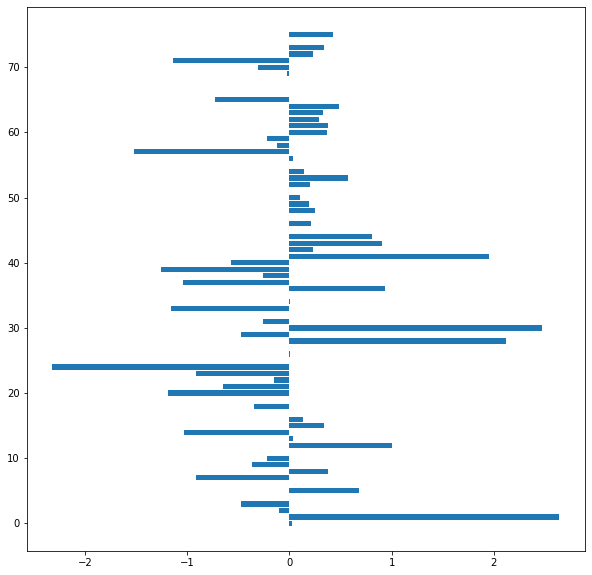

In [ ]:
#Importance of featues for Logistic Regression - Binary Classification

importance = clf_lr.coef_[0]

# Summary of feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' %(i,v))

# Plotting feature importance
plt.figure(figsize = (10,10))
plt.barh([x for x in range(len(importance))], importance)

Observations:


1.   As visible from the plot, different features have different importance.



**Systematic-removal of features using recursive feature elimination.**

In [ ]:
from sklearn.feature_selection import RFECV

selector = RFECV(clf_lr , step=1, cv = 5)
selector = selector.fit(x_train, y_train.ravel())

print("Number of Features selected: " + str(selector.n_features_))
y_true_rfecv_lr, y_pred_rfecv_lr = np.squeeze(y_valid), selector.predict(x_valid)

print(classification_report(y_true_rfecv_lr, y_pred_rfecv_lr))
print('------------------------------------------------------------------------')
print(f'ROC-AUC')
print(sklearn.metrics.roc_auc_score(y_true_rfecv_lr, y_pred_rfecv_lr, average='macro', sample_weight=None, max_fpr=None, multi_class='raise', labels=None))

Number of Features selected: 50
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98        99
         1.0       0.96      0.98      0.97        54

    accuracy                           0.98       153
   macro avg       0.98      0.98      0.98       153
weighted avg       0.98      0.98      0.98       153

------------------------------------------------------------------------
ROC-AUC
0.9806397306397306


Observations:


1.   After removing the features systematically, we see an imporvement in RUC-AUC Score for the validation data. 
2. Earlier, it was 0.97998 and after implementing RFECV it improves to 0.98064



**Multi-label Classification**

In [ ]:
# Implementing Multi-Label Classification using Elastic-Net Logistic Regression
# Defining Elastic Net Logistic Regression
lr_multi = LogisticRegression(penalty='elasticnet', solver='saga', max_iter = 900, multi_class = "multinomial", l1_ratio = 0.4)

# Defining the five-fold Cross Validator
num_folds = 5
kfold = KFold(n_splits = num_folds, shuffle=True)

# Defining variable to compute average AUC-ROC 
roc_auc_mean_lr_multi = 0

# Five-fold Cross Validation model evaluation
fold_num = 1

for train_multi, test_multi in kfold.split(inputs_multi, targets_multi):
  
  # Performing Elastic Net Logistic Regression
  clf_lr_multi = lr_multi.fit(inputs_multi[train_multi], targets_multi[train_multi].ravel())
  
  y_pred_lr_multi = lr_multi.predict(inputs_multi[test_multi])
  y_lr_pred_score = lr_multi.predict_proba(inputs_multi[test_multi])

  # Printing performance metrics
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_num} ...')

  print(classification_report(targets_multi[test_multi], y_pred_lr_multi))

  print(sklearn.metrics.roc_auc_score(targets_multi[test_multi], y_lr_pred_score, average='macro', sample_weight=None, max_fpr=None, multi_class='ovr', labels=None))

  roc_auc_mean_lr_multi = roc_auc_mean_lr_multi + sklearn.metrics.roc_auc_score(targets_multi[test_multi], y_lr_pred_score, average='macro', sample_weight=None, max_fpr=None, multi_class='ovr', labels=None)
  
  # Increasing the fold number
  fold_num = fold_num + 1

print('------------------------------------------------------------------------')
print(f'Average ROC-AUC')
print(roc_auc_mean_lr_multi/5)

------------------------------------------------------------------------
Training for fold 1 ...
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97        44
         1.0       0.98      0.98      0.98        44
         2.0       0.97      0.95      0.96        37
         3.0       0.96      0.96      0.96        28

    accuracy                           0.97       153
   macro avg       0.97      0.97      0.97       153
weighted avg       0.97      0.97      0.97       153

0.9968372312212869
------------------------------------------------------------------------
Training for fold 2 ...
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99        40
         1.0       1.00      1.00      1.00        56
         2.0       1.00      0.97      0.99        35
         3.0       1.00      1.00      1.00        22

    accuracy                           0.99       153
   macro avg       0.99   

**Computing the feature-importance.**

Feature: 0, Score: 0.22706
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.42020
Feature: 3, Score: 0.38409
Feature: 4, Score: 1.07603
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.29153
Feature: 7, Score: 0.05504
Feature: 8, Score: -0.62444
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.04713
Feature: 11, Score: 0.12766
Feature: 12, Score: 0.03437
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.22255
Feature: 15, Score: -0.26309
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.07671
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: -1.04183
Feature: 22, Score: 0.00000
Feature: 23, Score: -0.06491
Feature: 24, Score: -0.04809
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.16576
Feature: 27, Score: -0.79654
Feature: 28, Score: 0.69869
Feature: 29, Score: -0.29551
Feature: 30, Score: 0.80279
Feature: 31, Score: 0.00000
Feature: 32, Score: -1.13247
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score: 0.

<BarContainer object of 76 artists>

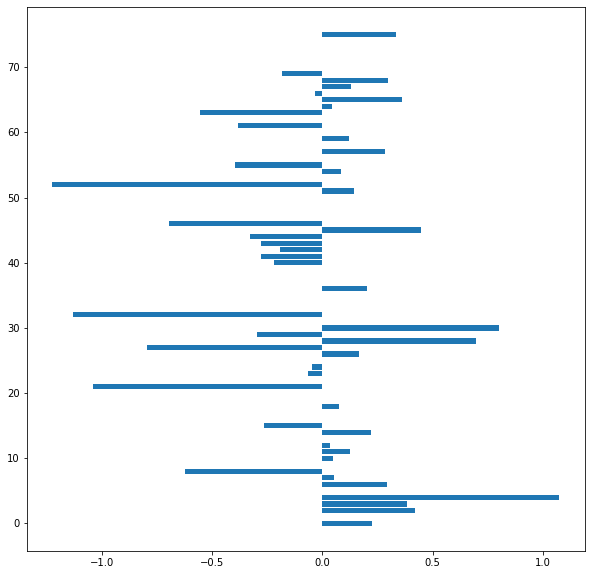

In [ ]:
#Importance of featues for Logistic Regression - Multi label Classification

importance = clf_lr_multi.coef_[0]

# Summary of feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' %(i,v))

# Plotting feature importance
plt.figure(figsize = (10,10))
plt.barh([x for x in range(len(importance))], importance)

Observations:


1.   Feature Importance of the same feature is significantly different for binary and multi-label classification, considering Logistic Regression model. 
2. Same proteins are not equally important for the two classifications done. 



**Systematic-removal of features using recursive feature elimination.**

In [ ]:
from sklearn.feature_selection import RFECV

selector = RFECV(clf_lr_multi , step=1, cv = 5)
selector = selector.fit(x_train_multi, y_train_multi.ravel())

print("Number of Features selected: " + str(selector.n_features_))
y_true_rfecv_lr_multi, y_pred_rfecv_lr_multi = np.squeeze(y_valid_multi), selector.predict(x_valid_multi)

y_lr_pred_score_rfecv = lr_multi.predict_proba(x_valid_multi)

print(classification_report(y_true_rfecv_lr_multi, y_pred_rfecv_lr_multi))
print('------------------------------------------------------------------------')
print(f'ROC-AUC')
print(sklearn.metrics.roc_auc_score(y_true_rfecv_lr_multi, y_lr_pred_score_rfecv, average='macro', sample_weight=None, max_fpr=None, multi_class='ovr', labels=None))

Number of Features selected: 63
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98        47
         1.0       1.00      1.00      1.00        39
         2.0       0.98      0.98      0.98        42
         3.0       1.00      1.00      1.00        25

    accuracy                           0.99       153
   macro avg       0.99      0.99      0.99       153
weighted avg       0.99      0.99      0.99       153

------------------------------------------------------------------------
ROC-AUC
1.0


Observations: 


1.  After implementing RFECV we observe quite an improvement in the ROC-AUC score. 
2. After RFECV, RUC-AUC score becomes 1.



### b. Neural Network

Implementing Neural network with single ReLU hidden layer and Softmax output (number of neurons, weight decay)


**Binary Classification**

In [ ]:
# Importing the classifier
from sklearn.neural_network import MLPClassifier

# Building the model 
mlp = MLPClassifier(hidden_layer_sizes=(128), activation='relu', max_iter=900)

# Defining the five-fold Cross Validator
num_folds = 5
kfold = KFold(n_splits = num_folds, shuffle=True)

# Defining variable to compute average AUC-ROC 
roc_auc_mean_mlp = 0

# Five-fold Cross Validation model evaluation
fold_num = 1

for train, test in kfold.split(inputs, targets):
  
  # Performing Elastic Net Logistic Regression
  clf_mlp = mlp.fit(inputs[train], targets[train].ravel())
  y_pred_mlp = mlp.predict(inputs[test])

  # Printing performance metrics
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_num} ...')

  print(classification_report(targets[test], y_pred_mlp))

  print(f'ROC-AUC Score {fold_num} ...')
  print(sklearn.metrics.roc_auc_score(targets[test], y_pred_mlp, average='macro', sample_weight=None, max_fpr=None, multi_class='raise', labels=None))

  roc_auc_mean_mlp = roc_auc_mean_mlp + sklearn.metrics.roc_auc_score(targets[test], y_pred_mlp, average='macro', sample_weight=None, max_fpr=None, multi_class='raise', labels=None)
  # Increasing the fold number
  fold_num = fold_num + 1

print('------------------------------------------------------------------------')
print(f'Average ROC-AUC')
print(roc_auc_mean_mlp/5)

------------------------------------------------------------------------
Training for fold 1 ...
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        90
         1.0       1.00      1.00      1.00        63

    accuracy                           1.00       153
   macro avg       1.00      1.00      1.00       153
weighted avg       1.00      1.00      1.00       153

ROC-AUC Score 1 ...
1.0
------------------------------------------------------------------------
Training for fold 2 ...
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99        94
         1.0       0.98      0.98      0.98        59

    accuracy                           0.99       153
   macro avg       0.99      0.99      0.99       153
weighted avg       0.99      0.99      0.99       153

ROC-AUC Score 2 ...
0.9862062747926433
------------------------------------------------------------------------
Training for fol

**Computing the feature-importance.**

In [ ]:
#Importance of featues for Neural Network - Binary Classification
from sklearn.metrics import accuracy_score

def get_feature_importance(j, n, x_test, y_test, model):
  y_pred = model.predict(x_test)
  s = accuracy_score(y_test, y_pred) # baseline score
  total = 0.0
  for i in range(n):
    perm = np.random.permutation(range(x_test.shape[0]))
    x_test_ = x_test.copy()
    x_test_[:, j] = x_test[perm, j]
    y_pred_ = model.predict(x_test_)
    s_ij = accuracy_score(y_test, y_pred_)
    total += s_ij
  return s - total / n

f = []
for j in range(inputs.shape[1]):
  f_j = get_feature_importance(j, 100, inputs, targets, mlp)
  f.append(f_j)

for i,v in enumerate(f):
	print('Feature: %0d, Score: %.5f' %(i,v))

Feature: 0, Score: 0.00104
Feature: 1, Score: 0.00975
Feature: 2, Score: -0.00063
Feature: 3, Score: 0.00010
Feature: 4, Score: 0.00007
Feature: 5, Score: 0.00064
Feature: 6, Score: 0.00008
Feature: 7, Score: 0.00014
Feature: 8, Score: 0.00093
Feature: 9, Score: 0.00007
Feature: 10, Score: 0.00028
Feature: 11, Score: 0.00117
Feature: 12, Score: 0.00144
Feature: 13, Score: 0.00010
Feature: 14, Score: 0.00035
Feature: 15, Score: 0.00105
Feature: 16, Score: 0.00121
Feature: 17, Score: 0.00140
Feature: 18, Score: 0.00016
Feature: 19, Score: 0.00059
Feature: 20, Score: 0.00157
Feature: 21, Score: 0.00020
Feature: 22, Score: 0.00012
Feature: 23, Score: -0.00049
Feature: 24, Score: -0.00084
Feature: 25, Score: 0.00025
Feature: 26, Score: 0.00071
Feature: 27, Score: 0.00076
Feature: 28, Score: 0.00207
Feature: 29, Score: 0.00029
Feature: 30, Score: 0.02941
Feature: 31, Score: 0.00003
Feature: 32, Score: 0.00017
Feature: 33, Score: 0.00308
Feature: 34, Score: 0.00037
Feature: 35, Score: 0.00035

**Multi-label Classification**

In [ ]:
# Building the model
mlp_multi = MLPClassifier(hidden_layer_sizes=(128), activation='relu', max_iter=100)

# Defining the five-fold Cross Validator
num_folds = 5
kfold = KFold(n_splits = num_folds, shuffle=True)

# Defining variable to compute average AUC-ROC 
roc_auc_mean_mlp_multi = 0

# Five-fold Cross Validation model evaluation
fold_num = 1

for train_multi, test_multi in kfold.split(inputs_multi, targets_multi):
  
  # Performing Elastic Net Logistic Regression
  clf_mlp_multi = mlp_multi.fit(inputs_multi[train_multi], targets_multi[train_multi].ravel())
  
  y_pred_mlp_multi = mlp_multi.predict(inputs_multi[test_multi])
  y_mlp_pred_score = mlp_multi.predict_proba(inputs_multi[test_multi])

  # Printing performance metrics
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_num} ...')

  print(classification_report(targets_multi[test_multi], y_pred_mlp_multi))

  print(sklearn.metrics.roc_auc_score(targets_multi[test_multi], y_mlp_pred_score, average='macro', sample_weight=None, max_fpr=None, multi_class='ovr', labels=None))

  roc_auc_mean_mlp_multi = roc_auc_mean_mlp_multi + sklearn.metrics.roc_auc_score(targets_multi[test_multi], y_mlp_pred_score, average='macro', sample_weight=None, max_fpr=None, multi_class='ovr', labels=None)
  
  # Increasing the fold number
  fold_num = fold_num + 1

print('------------------------------------------------------------------------')
print(f'Average ROC-AUC')
print(roc_auc_mean_mlp_multi/5)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


------------------------------------------------------------------------
Training for fold 1 ...
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        51
         1.0       1.00      1.00      1.00        37
         2.0       1.00      1.00      1.00        40
         3.0       1.00      1.00      1.00        25

    accuracy                           1.00       153
   macro avg       1.00      1.00      1.00       153
weighted avg       1.00      1.00      1.00       153

1.0


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


------------------------------------------------------------------------
Training for fold 2 ...
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        42
         1.0       1.00      1.00      1.00        48
         2.0       1.00      1.00      1.00        44
         3.0       1.00      1.00      1.00        19

    accuracy                           1.00       153
   macro avg       1.00      1.00      1.00       153
weighted avg       1.00      1.00      1.00       153

1.0


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


------------------------------------------------------------------------
Training for fold 3 ...
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        46
         1.0       0.98      1.00      0.99        46
         2.0       1.00      1.00      1.00        29
         3.0       1.00      0.97      0.98        31

    accuracy                           0.99       152
   macro avg       0.99      0.99      0.99       152
weighted avg       0.99      0.99      0.99       152

1.0


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


------------------------------------------------------------------------
Training for fold 4 ...
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        49
         1.0       1.00      1.00      1.00        45
         2.0       1.00      1.00      1.00        32
         3.0       1.00      1.00      1.00        26

    accuracy                           1.00       152
   macro avg       1.00      1.00      1.00       152
weighted avg       1.00      1.00      1.00       152

1.0
------------------------------------------------------------------------
Training for fold 5 ...
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        37
         1.0       1.00      0.98      0.99        49
         2.0       1.00      1.00      1.00        35
         3.0       0.97      1.00      0.98        31

    accuracy                           0.99       152
   macro avg       0.99      0.99      0.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


**Computing the feature-importance**

In [ ]:
f_multi = []
for j in range(inputs.shape[1]):
  f_j = get_feature_importance(j, 100, inputs_multi, targets_multi, mlp_multi)
  f_multi.append(f_j)

for i,v in enumerate(f_multi):
	print('Feature: %0d, Score: %.5f' %(i,v))

Feature: 0, Score: 0.00122
Feature: 1, Score: 0.00068
Feature: 2, Score: 0.00080
Feature: 3, Score: 0.00005
Feature: 4, Score: 0.00152
Feature: 5, Score: 0.00108
Feature: 6, Score: 0.00336
Feature: 7, Score: 0.00320
Feature: 8, Score: 0.00118
Feature: 9, Score: 0.00007
Feature: 10, Score: 0.00091
Feature: 11, Score: 0.00151
Feature: 12, Score: -0.00039
Feature: 13, Score: 0.00101
Feature: 14, Score: 0.00035
Feature: 15, Score: 0.00029
Feature: 16, Score: 0.00031
Feature: 17, Score: 0.00472
Feature: 18, Score: 0.00185
Feature: 19, Score: -0.00020
Feature: 20, Score: 0.00046
Feature: 21, Score: 0.00379
Feature: 22, Score: 0.00013
Feature: 23, Score: 0.00115
Feature: 24, Score: 0.00102
Feature: 25, Score: 0.00037
Feature: 26, Score: 0.00228
Feature: 27, Score: 0.00121
Feature: 28, Score: 0.00115
Feature: 29, Score: 0.00037
Feature: 30, Score: 0.00033
Feature: 31, Score: 0.00039
Feature: 32, Score: 0.00014
Feature: 33, Score: 0.00108
Feature: 34, Score: 0.00034
Feature: 35, Score: 0.00028


### c. Support Vector Machine

Implementing SVM (a few kernels, their hyper-parameters such as width, and slack penalty)

Reference: https://www.hackerearth.com/blog/developers/simple-tutorial-svm-parameter-tuning-python-r/

**Binary Classification**

In [ ]:
# Implementing Binary Classification using Support Vector Machine
from sklearn.svm import SVC

svm = SVC(kernel='linear')
# Defining the five-fold Cross Validator
num_folds = 5
kfold = KFold(n_splits = num_folds, shuffle=True)

# Defining variable to compute average AUC-ROC 
roc_auc_mean_svm = 0

# Five-fold Cross Validation model evaluation
fold_num = 1  

for train, test in kfold.split(inputs, targets):
  clf_svm = svm.fit(inputs[train], targets[train].ravel())
  y_pred_svm = svm.predict(inputs[test])

  # Printing performance metrics
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_num} ...')

  print(classification_report(targets[test], y_pred_svm))

  print(sklearn.metrics.roc_auc_score(targets[test], y_pred_svm, average='macro', sample_weight=None, max_fpr=None, multi_class='raise', labels=None))

  roc_auc_mean_svm = roc_auc_mean_svm + sklearn.metrics.roc_auc_score(targets[test], y_pred_svm, average='macro', sample_weight=None, max_fpr=None, multi_class='raise', labels=None)
  
  # Increasing the fold number
  fold_num = fold_num + 1

print('------------------------------------------------------------------------')
print(f'Average ROC-AUC')
print(roc_auc_mean_svm/5)

------------------------------------------------------------------------
Training for fold 1 ...
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98        88
         1.0       0.98      0.97      0.98        65

    accuracy                           0.98       153
   macro avg       0.98      0.98      0.98       153
weighted avg       0.98      0.98      0.98       153

0.9789335664335664
------------------------------------------------------------------------
Training for fold 2 ...
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99        91
         1.0       1.00      0.97      0.98        62

    accuracy                           0.99       153
   macro avg       0.99      0.98      0.99       153
weighted avg       0.99      0.99      0.99       153

0.9838709677419355
------------------------------------------------------------------------
Training for fold 3 ...
              pre

**Computing the feature-importance**

In [ ]:
#Importance of featues for Logistic Regression - Binary Classification

f = []
for j in range(inputs.shape[1]):
  f_j = get_feature_importance(j, 100, inputs, targets, svm)
  f.append(f_j)

for i,v in enumerate(f):
	print('Feature: %0d, Score: %.5f' %(i,v))

Feature: 0, Score: -0.00003
Feature: 1, Score: 0.15332
Feature: 2, Score: -0.00112
Feature: 3, Score: 0.05294
Feature: 4, Score: -0.00106
Feature: 5, Score: 0.01635
Feature: 6, Score: -0.00050
Feature: 7, Score: 0.03139
Feature: 8, Score: 0.00461
Feature: 9, Score: 0.00575
Feature: 10, Score: -0.00093
Feature: 11, Score: -0.00072
Feature: 12, Score: 0.07894
Feature: 13, Score: 0.00133
Feature: 14, Score: 0.04471
Feature: 15, Score: 0.00622
Feature: 16, Score: 0.00576
Feature: 17, Score: 0.00367
Feature: 18, Score: 0.00160
Feature: 19, Score: 0.00839
Feature: 20, Score: 0.04033
Feature: 21, Score: 0.00458
Feature: 22, Score: 0.00159
Feature: 23, Score: 0.05395
Feature: 24, Score: 0.16273
Feature: 25, Score: -0.00122
Feature: 26, Score: -0.00104
Feature: 27, Score: 0.00703
Feature: 28, Score: 0.13172
Feature: 29, Score: 0.00220
Feature: 30, Score: 0.14993
Feature: 31, Score: 0.00346
Feature: 32, Score: -0.00035
Feature: 33, Score: 0.08636
Feature: 34, Score: 0.01361
Feature: 35, Score: -

**Systematic-removal of features using recursive feature elimination.**

In [ ]:
from sklearn.feature_selection import RFECV

selector = RFECV(clf_svm , step=1, cv = 5)
selector = selector.fit(x_train, y_train.ravel())

print("Number of Features selected: " + str(selector.n_features_))
y_true_rfecv_svm, y_pred_rfecv_svm = np.squeeze(y_valid), selector.predict(x_valid)

print(classification_report(y_true_rfecv_svm, y_pred_rfecv_svm))
print('------------------------------------------------------------------------')
print(f'ROC-AUC')
print(sklearn.metrics.roc_auc_score(y_true_rfecv_svm, y_pred_rfecv_svm, average='macro', sample_weight=None, max_fpr=None, multi_class='raise', labels=None))

Number of Features selected: 51
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98        97
         1.0       0.98      0.96      0.97        56

    accuracy                           0.98       153
   macro avg       0.98      0.98      0.98       153
weighted avg       0.98      0.98      0.98       153

------------------------------------------------------------------------
ROC-AUC
0.9769882179675995


**Multi-label Classification**

In [ ]:
svm_multi = SVC(kernel='linear', probability=True)

# Defining the five-fold Cross Validator
num_folds = 5
kfold = KFold(n_splits = num_folds, shuffle=True)

# Defining variable to compute average AUC-ROC 
roc_auc_mean_svm_multi = 0

# Five-fold Cross Validation model evaluation
fold_num = 1  

for train_multi_multi, test_multi in kfold.split(inputs_multi, targets_multi):
  clf_svm_multi = svm_multi.fit(inputs_multi[train_multi], targets_multi[train_multi].ravel())
  
  y_pred_svm_multi = svm_multi.predict(inputs_multi[test_multi])
  y_svm_multi_score = svm_multi.predict_proba(inputs_multi[test_multi])

  # Printing performance metrics
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_num} ...')

  print(classification_report(targets_multi[test_multi], y_pred_svm_multi))
 
  print(sklearn.metrics.roc_auc_score(targets_multi[test_multi], y_svm_multi_score, average='macro', sample_weight=None, max_fpr=None, multi_class='ovr', labels=None))

  roc_auc_mean_svm_multi = roc_auc_mean_svm_multi + sklearn.metrics.roc_auc_score(targets_multi[test_multi], y_svm_multi_score, average='macro', sample_weight=None, max_fpr=None, multi_class='ovr', labels=None)
  
  # Increasing the fold number
  fold_num = fold_num + 1

print('------------------------------------------------------------------------')
print(f'Average ROC-AUC')
print(roc_auc_mean_svm_multi /5)

------------------------------------------------------------------------
Training for fold 1 ...
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99        45
         1.0       1.00      1.00      1.00        50
         2.0       1.00      0.96      0.98        26
         3.0       1.00      1.00      1.00        32

    accuracy                           0.99       153
   macro avg       0.99      0.99      0.99       153
weighted avg       0.99      0.99      0.99       153

1.0
------------------------------------------------------------------------
Training for fold 2 ...
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        45
         1.0       1.00      1.00      1.00        41
         2.0       1.00      1.00      1.00        44
         3.0       1.00      1.00      1.00        23

    accuracy                           1.00       153
   macro avg       1.00      1.00      1.

**Computing the feature-importance**

In [ ]:
#Importance of featues for Logistic Regression - Binary Classification

f_multi = []
for j in range(inputs_multi.shape[1]):
  f_j = get_feature_importance(j, 100, inputs_multi, targets_multi, svm_multi)
  f_multi.append(f_j)

for i,v in enumerate(f_multi):
	print('Feature: %0d, Score: %.5f' %(i,v))

Feature: 0, Score: 0.00070
Feature: 1, Score: 0.00012
Feature: 2, Score: 0.01539
Feature: 3, Score: 0.00507
Feature: 4, Score: 0.00444
Feature: 5, Score: 0.00013
Feature: 6, Score: 0.00253
Feature: 7, Score: 0.04629
Feature: 8, Score: 0.00669
Feature: 9, Score: 0.00251
Feature: 10, Score: 0.00694
Feature: 11, Score: 0.00508
Feature: 12, Score: 0.00201
Feature: 13, Score: -0.00000
Feature: 14, Score: 0.00123
Feature: 15, Score: 0.00547
Feature: 16, Score: 0.00289
Feature: 17, Score: 0.04248
Feature: 18, Score: -0.00000
Feature: 19, Score: 0.00354
Feature: 20, Score: 0.00126
Feature: 21, Score: 0.03812
Feature: 22, Score: 0.00034
Feature: 23, Score: 0.00165
Feature: 24, Score: 0.01996
Feature: 25, Score: 0.01172
Feature: 26, Score: -0.00031
Feature: 27, Score: 0.00277
Feature: 28, Score: 0.02957
Feature: 29, Score: 0.01419
Feature: 30, Score: 0.03031
Feature: 31, Score: 0.01024
Feature: 32, Score: 0.00466
Feature: 33, Score: 0.00440
Feature: 34, Score: 0.00193
Feature: 35, Score: 0.00013

**Systematic-removal of features using recursive feature elimination.**

In [ ]:
from sklearn.feature_selection import RFECV

selector = RFECV(clf_svm_multi , step=1, cv = 5)
selector = selector.fit(x_train_multi, y_train_multi.ravel())

print("Number of Features selected: " + str(selector.n_features_))
y_true_rfecv_svm_multi, y_pred_rfecv_svm_multi = np.squeeze(y_valid_multi), selector.predict(x_valid_multi)

y_svm_pred_score_rfecv = svm_multi.predict_proba(x_valid_multi)

print(classification_report(y_true_rfecv_svm_multi, y_pred_rfecv_svm_multi))
print('------------------------------------------------------------------------')
print(f'ROC-AUC')
print(sklearn.metrics.roc_auc_score(y_true_rfecv_svm_multi, y_svm_pred_score_rfecv , average='macro', sample_weight=None, max_fpr=None, multi_class='ovr', labels=None))

Number of Features selected: 41
              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97        48
         1.0       1.00      1.00      1.00        50
         2.0       0.94      0.97      0.95        32
         3.0       1.00      1.00      1.00        23

    accuracy                           0.98       153
   macro avg       0.98      0.98      0.98       153
weighted avg       0.98      0.98      0.98       153

------------------------------------------------------------------------
ROC-AUC
0.9997716614193887


### d. Random Forest

Implementing Random Forest (number of trees, max tree depth, max number of variables per node)

**Binary Classification**

In [ ]:
# Implementing Binary Classification using Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Building the RFM
rfm = RandomForestClassifier(n_estimators=70, oob_score=True, n_jobs=-1,random_state=101,max_features=None, min_samples_leaf=30)

# Defining the five-fold Cross Validator
num_folds = 5
kfold = KFold(n_splits = num_folds, shuffle=True)

# Defining variable to compute average AUC-ROC 
roc_auc_mean_rfm = 0

# Five-fold Cross Validation model evaluation
fold_num = 1  

for train, test in kfold.split(inputs, targets):
  clf_rfm = rfm.fit(inputs[train], targets[train].ravel())
  y_pred_rfm = rfm.predict(inputs[test])

  # Printing performance metrics
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_num} ...')

  print(classification_report(targets[test], y_pred_rfm))

  print(sklearn.metrics.roc_auc_score(targets[test], y_pred_rfm, average='macro', sample_weight=None, max_fpr=None, multi_class='ovo', labels=None))

  roc_auc_mean_rfm = roc_auc_mean_rfm  + sklearn.metrics.roc_auc_score(targets[test], y_pred_rfm, average='macro', sample_weight=None, max_fpr=None, multi_class='ovo', labels=None)
  
  # Increasing the fold number
  fold_num = fold_num + 1

print('------------------------------------------------------------------------')
print(f'Average ROC-AUC')
print(roc_auc_mean_rfm/5)

------------------------------------------------------------------------
Training for fold 1 ...
              precision    recall  f1-score   support

         0.0       0.84      0.89      0.86        87
         1.0       0.84      0.77      0.80        66

    accuracy                           0.84       153
   macro avg       0.84      0.83      0.83       153
weighted avg       0.84      0.84      0.84       153

0.8288923719958203
------------------------------------------------------------------------
Training for fold 2 ...
              precision    recall  f1-score   support

         0.0       0.90      0.84      0.87        93
         1.0       0.77      0.85      0.81        60

    accuracy                           0.84       153
   macro avg       0.83      0.84      0.84       153
weighted avg       0.85      0.84      0.84       153

0.8443548387096775
------------------------------------------------------------------------
Training for fold 3 ...
              pre

**Computing the feature-importance**

Feature: 0, Score: 0.00612
Feature: 1, Score: 0.02159
Feature: 2, Score: 0.00889
Feature: 3, Score: 0.01085
Feature: 4, Score: 0.00016
Feature: 5, Score: 0.00244
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00011
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.01011
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00932
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00020
Feature: 17, Score: 0.00046
Feature: 18, Score: 0.00155
Feature: 19, Score: 0.00051
Feature: 20, Score: 0.00070
Feature: 21, Score: 0.00036
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00348
Feature: 24, Score: 0.00618
Feature: 25, Score: 0.00010
Feature: 26, Score: 0.00088
Feature: 27, Score: 0.00004
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00019
Feature: 30, Score: 0.50008
Feature: 31, Score: 0.00239
Feature: 32, Score: 0.00790
Feature: 33, Score: 0.04506
Feature: 34, Score: 0.00003
Feature: 35, Score: 0.01306
Fe

<BarContainer object of 76 artists>

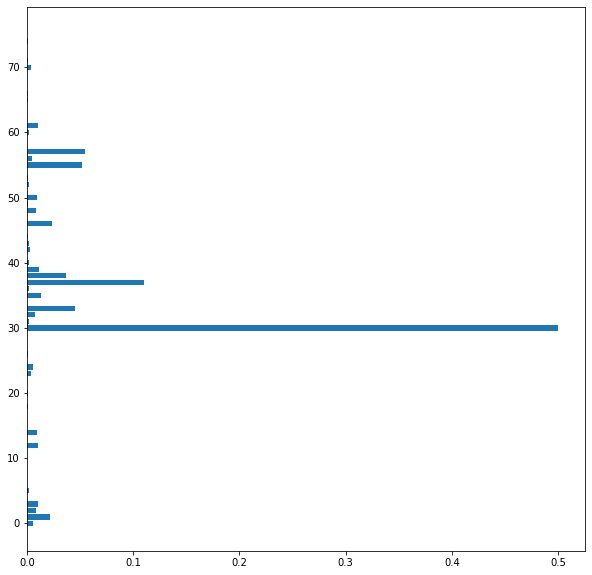

In [ ]:
#Importance of featues for Logistic Regression - Binary Classification

importance = clf_rfm.feature_importances_

# Summary of feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

# Plotting feature importance
plt.figure(figsize = (10,10))
plt.barh([x for x in range(len(importance))], importance)

**Systematic-removal of features using recursive feature elimination**

In [ ]:
from sklearn.feature_selection import RFECV

selector = RFECV(clf_rfm , step=1, cv = 5)
selector = selector.fit(x_train, y_train.ravel())

print("Number of Features selected: " + str(selector.n_features_))
y_true_rfecv_rfm, y_pred_rfecv_rfm = np.squeeze(y_valid), selector.predict(x_valid)

print(classification_report(y_true_rfecv_rfm, y_pred_rfecv_rfm))
print('------------------------------------------------------------------------')
print(f'ROC-AUC')
print(sklearn.metrics.roc_auc_score(y_true_rfecv_rfm, y_pred_rfecv_rfm, average='macro', sample_weight=None, max_fpr=None, multi_class='raise', labels=None))

Number of Features selected: 20
              precision    recall  f1-score   support

         0.0       0.91      0.89      0.90        99
         1.0       0.80      0.83      0.82        54

    accuracy                           0.87       153
   macro avg       0.86      0.86      0.86       153
weighted avg       0.87      0.87      0.87       153

------------------------------------------------------------------------
ROC-AUC
0.8611111111111112


**Multi-label Classification**

In [ ]:
# Building the model
rfm_multi = RandomForestClassifier(n_estimators=70, oob_score=True, n_jobs=-1,random_state=101,max_features=None, min_samples_leaf=30)

# Defining the five-fold Cross Validator
num_folds = 5
kfold = KFold(n_splits = num_folds, shuffle=True)

# Defining variable to compute average AUC-ROC 
roc_auc_mean_rfm_multi = 0

# Five-fold Cross Validation model evaluation
fold_num = 1

for train_multi, test_multi in kfold.split(inputs_multi, targets_multi):
  
  # Performing Elastic Net Logistic Regression
  clf_rfm_multi = rfm_multi.fit(inputs_multi[train_multi], targets_multi[train_multi].ravel())
  
  y_pred_rfm_multi = rfm_multi.predict(inputs_multi[test_multi])
  y_rfm_pred_score = rfm_multi.predict_proba(inputs_multi[test_multi])

  # Printing performance metrics
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_num} ...')

  print(classification_report(targets_multi[test_multi], y_pred_rfm_multi))

  print(sklearn.metrics.roc_auc_score(targets_multi[test_multi], y_rfm_pred_score, average='macro', sample_weight=None, max_fpr=None, multi_class='ovr', labels=None))

  roc_auc_mean_rfm_multi = roc_auc_mean_rfm_multi + sklearn.metrics.roc_auc_score(targets_multi[test_multi], y_rfm_pred_score, average='macro', sample_weight=None, max_fpr=None, multi_class='ovr', labels=None)
  
  # Increasing the fold number
  fold_num = fold_num + 1

print('------------------------------------------------------------------------')
print(f'Average ROC-AUC')
print(roc_auc_mean_rfm_multi/5)

------------------------------------------------------------------------
Training for fold 1 ...
              precision    recall  f1-score   support

         0.0       0.82      0.93      0.87        40
         1.0       1.00      0.98      0.99        46
         2.0       0.92      0.77      0.84        43
         3.0       0.89      1.00      0.94        24

    accuracy                           0.91       153
   macro avg       0.91      0.92      0.91       153
weighted avg       0.91      0.91      0.91       153

0.9820808922039499
------------------------------------------------------------------------
Training for fold 2 ...
              precision    recall  f1-score   support

         0.0       0.80      0.74      0.77        50
         1.0       0.86      0.91      0.88        46
         2.0       0.67      0.75      0.71        32
         3.0       0.86      0.76      0.81        25

    accuracy                           0.80       153
   macro avg       0.80   

**Computing the feature-importance**

Feature: 0, Score: 0.00008
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00235
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00373
Feature: 5, Score: 0.02151
Feature: 6, Score: 0.01311
Feature: 7, Score: 0.04270
Feature: 8, Score: 0.00001
Feature: 9, Score: 0.00011
Feature: 10, Score: 0.00233
Feature: 11, Score: 0.00062
Feature: 12, Score: 0.00068
Feature: 13, Score: 0.00215
Feature: 14, Score: 0.00042
Feature: 15, Score: 0.00105
Feature: 16, Score: 0.00036
Feature: 17, Score: 0.00387
Feature: 18, Score: 0.00063
Feature: 19, Score: 0.00036
Feature: 20, Score: 0.00010
Feature: 21, Score: 0.00068
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00128
Feature: 25, Score: 0.00099
Feature: 26, Score: 0.00675
Feature: 27, Score: 0.00012
Feature: 28, Score: 0.00002
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00001
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.49179
Feature: 33, Score: 0.00076
Feature: 34, Score: 0.00826
Feature: 35, Score: 0.00522
Fe

<BarContainer object of 76 artists>

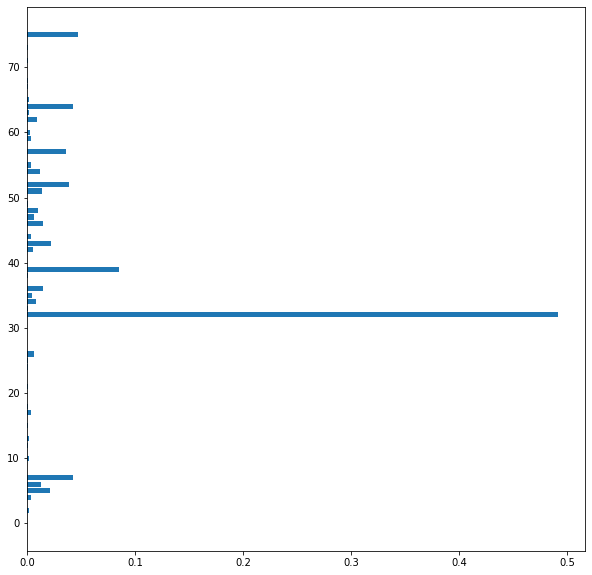

In [ ]:
#Importance of featues for Logistic Regression - Binary Classification

importance = clf_rfm_multi.feature_importances_

# Summary of feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

# Plotting feature importance
plt.figure(figsize = (10,10))
plt.barh([x for x in range(len(importance))], importance)

**Systematic-removal of features using recursive feature elimination**

In [ ]:
from sklearn.feature_selection import RFECV

selector = RFECV(clf_rfm_multi , step=1, cv = 5)
selector = selector.fit(x_train_multi, y_train_multi.ravel())

print("Number of Features selected: " + str(selector.n_features_))
y_true_rfecv_rfm_multi, y_pred_rfecv_rfm_multi = np.squeeze(y_valid_multi), selector.predict(x_valid_multi)

y_rfm_pred_score_rfecv = rfm_multi.predict_proba(x_valid_multi)

print(classification_report(y_true_rfecv_rfm_multi, y_pred_rfecv_rfm_multi))
print('------------------------------------------------------------------------')
print(f'ROC-AUC')
print(sklearn.metrics.roc_auc_score(y_true_rfecv_rfm_multi, y_rfm_pred_score_rfecv , average='macro', sample_weight=None, max_fpr=None, multi_class='ovr', labels=None))

Number of Features selected: 32
              precision    recall  f1-score   support

         0.0       0.68      0.85      0.75        47
         1.0       0.79      0.95      0.86        39
         2.0       0.79      0.62      0.69        42
         3.0       0.93      0.52      0.67        25

    accuracy                           0.76       153
   macro avg       0.80      0.73      0.74       153
weighted avg       0.78      0.76      0.75       153

------------------------------------------------------------------------
ROC-AUC
0.9815819624737799


### Testing the best models on test data

**Using MLP Classifier for binary classification on test data**

In [ ]:
# Importing the classifier
from sklearn.neural_network import MLPClassifier

y_pred_final = mlp.predict(test_X)
print(classification_report(test_Y_binary_enc, y_pred_final))

print(f'ROC-AUC Score {fold_num} ...')
print(sklearn.metrics.roc_auc_score(test_Y_binary_enc, y_pred_final, average='macro', sample_weight=None, max_fpr=None, multi_class='raise', labels=None))

print('------------------------------------------------------------------------')

              precision    recall  f1-score   support

         0.0       0.86      0.76      0.81       135
         1.0       0.69      0.82      0.75        90

    accuracy                           0.78       225
   macro avg       0.78      0.79      0.78       225
weighted avg       0.80      0.78      0.78       225

ROC-AUC Score 6 ...
0.7888888888888889
------------------------------------------------------------------------


**Using MLP Classifier for multi-label classification on test data**

In [ ]:
# Importing the classifier
from sklearn.neural_network import MLPClassifier

y_pred_final_multi = mlp_multi.predict(test_X)
y_mlp_pred_score = mlp_multi.predict_proba(test_X)

print(classification_report(test_Y_multi_enc, y_pred_final_multi))

print(f'ROC-AUC Score {fold_num} ...')
print(sklearn.metrics.roc_auc_score(test_Y_multi_enc, y_mlp_pred_score, average='macro', sample_weight=None, max_fpr=None, multi_class='ovr', labels=None))

print('------------------------------------------------------------------------')

              precision    recall  f1-score   support

         0.0       0.87      0.90      0.89        60
         1.0       0.88      0.93      0.90        60
         2.0       0.90      0.87      0.88        60
         3.0       0.90      0.82      0.86        45

    accuracy                           0.88       225
   macro avg       0.89      0.88      0.88       225
weighted avg       0.89      0.88      0.88       225

ROC-AUC Score 6 ...
0.9779657687991021
------------------------------------------------------------------------


**Using SVM for binary classification on test data**

In [ ]:

y_pred_final_svm = svm.predict(test_X)
print(classification_report(test_Y_binary_enc, y_pred_final_svm))

print(f'ROC-AUC Score {fold_num} ...')
print(sklearn.metrics.roc_auc_score(test_Y_binary_enc, y_pred_final_svm, average='macro', sample_weight=None, max_fpr=None, multi_class='raise', labels=None))

print('------------------------------------------------------------------------')

              precision    recall  f1-score   support

         0.0       0.92      0.72      0.81       135
         1.0       0.68      0.91      0.78        90

    accuracy                           0.80       225
   macro avg       0.80      0.81      0.79       225
weighted avg       0.83      0.80      0.80       225

ROC-AUC Score 6 ...
0.8148148148148149
------------------------------------------------------------------------


**Using SVM for multi-label classification on test data**

In [ ]:
y_pred_final_svm_multi = svm_multi.predict(test_X)
y_svm_pred_score = svm_multi.predict_proba(test_X)

print(classification_report(test_Y_multi_enc, y_pred_final_svm_multi))

print(f'ROC-AUC Score {fold_num} ...')
print(sklearn.metrics.roc_auc_score(test_Y_multi_enc, y_svm_pred_score, average='macro', sample_weight=None, max_fpr=None, multi_class='ovr', labels=None))

print('------------------------------------------------------------------------')

              precision    recall  f1-score   support

         0.0       0.81      0.85      0.83        60
         1.0       0.93      0.93      0.93        60
         2.0       0.84      0.80      0.82        60
         3.0       0.91      0.91      0.91        45

    accuracy                           0.87       225
   macro avg       0.87      0.87      0.87       225
weighted avg       0.87      0.87      0.87       225

ROC-AUC Score 6 ...
0.9799803591470257
------------------------------------------------------------------------


### Observations


1.   As we can see, feature importance, i.e, the importance of proteins is varying per model and is also different for binary & multi-label classification.
2.   Now, varying hyperparamters manually, the best models have been obtained by computing average ROC-AUC.


*   Logistic Regression - Binary - 0.979 - RUC/AUC Score
*   Logistic Regression - Multi Label - 0.999 - RUC/AUC Score
* Neural Network - Binary - 0.993 - RUC/AUC Score
* Neural Network - Multi Label - 1 - RUC/AUC Score
* SVM - Binary - 0.98 - RUC/AUC Score
* SVM - Multi Label - 1 - RUC/AUC Score
* RF - Binary - 0.84 - RUC/AUC Score
* RF - Multi Label - 0.96 - RUC/AUC Score

3. As per above data, the best models are Neural Network and SVM. Hence using them on test-data. We get the following scores:
* Neural Network - Binary - 0.78 - RUC/AUC Score
* Neural Network - Multi Label - 0.97 - RUC/AUC Score
* SVM - Binary - 0.81 - RUC/AUC Score
* SVM - Multi Label - 0.97 - RUC/AUC Score






### References 


1.   https://www.youtube.com/watch?v=Ato-hcv0NK0list=PLZKhx5nBXhfhL28m4mjIM5kSwh5gUV2k6&index=3

2. https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html

3. https://scikit-learn.org/stable/modules/impute.html

4. Apart from my team, I have discussed with Anjana Singh.



